# Project: Linking Climate Conditions to Economic Indicators

## Project Goal

The goal of the project was to determine whether there is a correlation between climate conditions of a country and its Economic Indicators. This can then be used as a tool to:

1. Persuade world leaders to take climate change more seriosly. The more temperatures and climate conditions fluctuate, the more of a problem this could be for them politically end economically.
2. Inform business owners where in the world and in what climates their companies may thrive the most (if they are dependent on that). 

The project aims to be used as a tool for informing people and for confirming assumptions written about in scientific papers, as well as predicting the effect of Climate Change on the Economic stability of countries around the world. 


## Project Requirements

Project requirements which were met include:
- Using more than one API to collect and fetch data
- Use of key scientific packages: Numpy, Matplotlib and Pandas


## Optional Additions

As well as the required features, the following were also included:
- Urllib package to access APIs which are commonly used to quickly fetch data required
- Refactoring through use of functions to increase the efficiency of the code and keep it looking tidy 
- Use of seaborn to further visualise data
- Use of folium to also visualise data
- Scipy to build models using linear regression and assess the quality of the models
- Plotting logarithmic lines of best fit to visualise trends in data
- Use of subplots and heatmaps


## Outcome

The results from the analysis show that there is a trend where the milder the temperature of the country, the higher the GDP per Capita is of that country.


## Limitations

Out of the countries filtered down through data cleaning and pre-processing there were none left which have extremely cold conditions, such as Kazakhstan which can get as cold as -40 degrees Celsius in the Winter. Only 29 countries were able to be analysed, which represents just 14.5% of the 195 countries in the world.

# Background and Context

Reading the book ‘Prisoners of Geography’, it has been suggested that the geographical properties of countries have a huge impact on the politics of the country, including likelihood of going to war and relationships with other countries. For example, India and China have a long border between them and have had many reasons to go to war previously. However, they have only had one, one-month long war in history. It is likely this is caused by the presence of one of the largest mountain ranges in the world between them – the Himalayas. On the flipside, Russia and Ukraine have one of the flattest plains of land along their borders, which is perhaps why they have had such conflicts which have so easily led to fights. Flat land means no difficult terrain to traverse to launch an attack on the other country. 

It is because of this strong link between land properties and politics that the current topic is being explored: the link between climate and economic success. Many articles have been published on supposed links between higher temperatures impacting economic growth. The propose the following :
1.	Higher temperatures reduce economic growth in poorer countries
2.	Higher temperatures reduce growth rates
3.	Higher temperatures impact agriculture, industry and political stability

However, many papers which exist on this topic are based on assumptions and basic statistical analysis. This project builds on this with more in-depth analysis. 

The findings of this project will be used as a tool for governments and business owners to plan with more justification. It will help climate-sensitive companies, by informing them where their business is likely to be most successful. It will do this by assessing GDP per Capita and the effect climate has on this. It can also be used as a tool to persuade governments into thinking more seriously about climate change. Global temperatures are increasing, and the findings of this report may show that higher temperatures are linked to lower GDP per capita and potentially higher unemployment and smaller populations. This is not optimal for governments.



# Import Packages

In [1]:
# Packages used throughout the notebook
import pandas as pd
from pprint import pprint as pp
import numpy as np

# Packages used to get data
import requests
import urllib.parse

# Datetime used to standardise the index of the dataframes
import time
import datetime as dt

# For exporting dataframes to csv files and creating new folders
import os
from os import listdir
from os.path import isfile, join

# For visualisation of the analysis: Heatmaps and World Maps
import folium
import matplotlib.pyplot as plt
from folium.plugins import MarkerCluster
import seaborn as sns

# Model building and training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to Import CSV File

In [2]:
def import_csv(name, headers):
    return pd.read_csv(name, header=headers)

# Importing, Cleaning and Inspecting Economic Data and Country Names

The WEO (World Economic Outlook) is a report released by the IMF (International Monetary Fund) that summarises a range of Economic Indicators of member countries. It provides predictions on some indicators over the next 5 years, and includes data on things such as GDP, unemployment, population and more. 

Step 1 is to process the data into a format that is easier to work with. The aim of the first stage of processing is to get it into a format that can then be read by the program and analysed further. 

.csv filename is the WEO Subject Code

The data is cleaned by:
- Removing white space from the column values so when one column is searched, i.e. WEO Subject Code searched for the string 'PPPPC' it recognises it still.
- Replacing commas from all values under the year columns, i.e. the numerical values, so that they can then be converted into numerical values. 
- 'NaN' values will be dealt with later on, as the weather data will filter the Countries allowed for analysis based on how much data is available. 

In [3]:
# Save the WEO spreadsheet as 'spreadsheet'
file_name = 'WEOOct2021all.csv'
header_lines = 0

spreadsheet = import_csv(file_name, header_lines)

## Exploratory Analysis

Inspecting the data.

In [4]:
# See what the spreadsheet looks like, what data is there and a general idea of the information that appears 
# in each variable column.
spreadsheet.head()

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2018,2019,2020,2021,2022,2023,2024,2025,2026,Estimates Start After
0,512,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,"1,270.22","1,319.90","1,288.87",NaN,NaN,NaN,NaN,NaN,NaN,2019.0
1,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,"See notes for: Gross domestic product, consta...",NaN,...,1.189,3.912,-2.351,NaN,NaN,NaN,NaN,NaN,NaN,2019.0
2,512,AFG,NGDP,Afghanistan,"Gross domestic product, current prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,"1,327.69","1,469.60","1,547.29",NaN,NaN,NaN,NaN,NaN,NaN,2019.0
3,512,AFG,NGDPD,Afghanistan,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,18.401,18.876,20.136,NaN,NaN,NaN,NaN,NaN,NaN,2019.0
4,512,AFG,PPPGDP,Afghanistan,"Gross domestic product, current prices",These data form the basis for the country weig...,Purchasing power parity; international dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,77.406,81.873,80.912,NaN,NaN,NaN,NaN,NaN,NaN,2019.0


In [5]:
# Number of rows and columns. There is a huge amount of data in this spreadsheet so it will need splitting
# into more manageable chunks and filtered into samples. 
spreadsheet.shape

(8823, 57)

In [6]:
# Get a list of the column names so we know what information is there
spreadsheet.columns.values

array(['WEO Country Code', 'ISO', 'WEO Subject Code', 'Country',
       'Subject Descriptor', 'Subject Notes', 'Units', 'Scale',
       'Country/Series-specific Notes', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023',
       '2024', '2025', '2026', 'Estimates Start After'], dtype=object)

In [7]:
# Find out the format of the data in the spreadsheet under each column
spreadsheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8823 entries, 0 to 8822
Data columns (total 57 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   WEO Country Code               8822 non-null   object 
 1   ISO                            8820 non-null   object 
 2   WEO Subject Code               8820 non-null   object 
 3   Country                        8820 non-null   object 
 4   Subject Descriptor             8820 non-null   object 
 5   Subject Notes                  8624 non-null   object 
 6   Units                          8820 non-null   object 
 7   Scale                          3920 non-null   object 
 8   Country/Series-specific Notes  7634 non-null   object 
 9   1980                           3872 non-null   object 
 10  1981                           3992 non-null   object 
 11  1982                           4032 non-null   object 
 12  1983                           4074 non-null   o

In [8]:
# How many times each Country comes up (i.e. how many variables there are for each country)
spreadsheet.Country.value_counts()

Afghanistan      45
Netherlands      45
Nicaragua        45
Niger            45
Nigeria          45
                 ..
Grenada          45
Guatemala        45
Guinea           45
Guinea-Bissau    45
Zimbabwe         45
Name: Country, Length: 196, dtype: int64

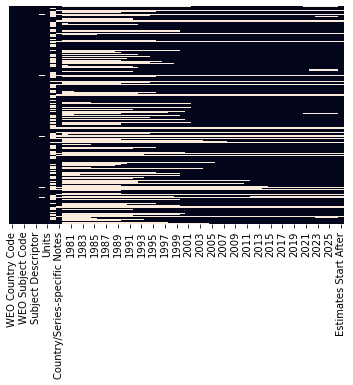

In [9]:
# Print a heatmap of missing values. Missing = white, there = black
sns.heatmap(spreadsheet.isnull(), cbar=False, yticklabels=False)
plt.show()

### Missing Values 

There are a lot of missing values in this dataframe. Therefore, countries with missing values must be filtered out later, or variables with missing values should not be used. 

## Cleaning Data

From the 'info()' method we can see that the values we want to be numerical are actually objects. Therefore they need to be converted to floats. 

However, by running 'spreadsheet.head()' you can see that many of these values contain commas which won't allow it to be converted to a float. The commas need to be removed then these values can be converted to floats.

In [10]:
# Convert all table entries to floats
spreadsheet.loc[:, '1980':] = spreadsheet.loc[:, '1980':].replace(',','', regex=True).apply(pd.to_numeric,errors='coerce')

In [11]:
# Remove rows with NaN values
spreadsheet = spreadsheet.dropna(axis=0, subset=[str(i) for i in range(1980, 2021)])
spreadsheet

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2018,2019,2020,2021,2022,2023,2024,2025,2026,Estimates Start After
45,914,ALB,NGDP_R,Albania,"Gross domestic product, constant prices",Expressed in billions of national currency uni...,National currency,Billions,Source: IMF Staff Estimates. Official national...,311.514,...,821.061,838.908,811.130,854.120,892.555,929.150,963.528,997.116,1031.810,2020.0
46,914,ALB,NGDP_RPCH,Albania,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,"See notes for: Gross domestic product, consta...",2.684,...,4.071,2.174,-3.311,5.300,4.500,4.100,3.700,3.486,3.479,2020.0
47,914,ALB,NGDP,Albania,"Gross domestic product, current prices",Expressed in billions of national currency uni...,National currency,Billions,Source: IMF Staff Estimates. Official national...,18.489,...,1635.720,1679.250,1607.980,1719.110,1824.660,1931.780,2039.330,2150.510,2267.580,2020.0
48,914,ALB,NGDPD,Albania,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",1.946,...,15.147,15.283,14.828,16.770,18.012,18.931,20.026,21.150,22.308,2020.0
49,914,ALB,PPPGDP,Albania,"Gross domestic product, current prices",These data form the basis for the country weig...,Purchasing power parity; international dollars,Billions,"See notes for: Gross domestic product, curren...",5.759,...,40.075,41.678,40.784,44.493,47.775,50.917,54.005,57.101,60.312,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8773,754,ZMB,BCA,Zambia,Current account balance,Current account is all transactions other than...,U.S. dollars,Billions,Source: Central Bank Latest actual data: 2019 ...,-0.589,...,-0.341,0.131,2.004,2.933,3.577,4.109,4.100,3.731,3.696,2019.0
8774,754,ZMB,BCA_NGDPD,Zambia,Current account balance,Current account is all transactions other than...,Percent of GDP,NaN,"See notes for: Gross domestic product, curren...",-13.867,...,-1.298,0.561,10.375,13.517,14.925,16.772,16.240,14.055,13.188,2019.0
8791,698,ZWE,PCPI,Zimbabwe,"Inflation, average consumer prices","Expressed in averages for the year, not end-of...",Index,NaN,Source: National Statistics Office Latest actu...,160.147,...,65.526,232.807,1530.030,2945.920,3849.100,4627.420,5444.420,6125.800,6741.300,2019.0
8802,698,ZWE,LP,Zimbabwe,Population,"For census purposes, the total population of t...",Persons,Millions,Source: National Statistics Office Latest actu...,7.092,...,14.642,14.905,15.189,15.492,15.817,16.164,16.481,16.790,17.095,2017.0


## Save WEO data as .csv files by Country Code

1. Create a new DataFrame containing unique values of 'WEO Subject Code' along with their associated 'Subject Descriptor' and 'Units'. This can be used later to identify the subject descriptor from the subject code. 

2. Create a directory called 'data' to save the files in.

3. For each WEO Subject Code, extract rows from the main WEO spreadsheet containing this data and save it to a .csv file with it's name being the WEO Subject Code.

Do the same for the Country rows, saving a new file for every country with all it's economic data in the file. 

In [12]:
# Identify Unique Country Names and WEO Subject Codes
countries = spreadsheet['Country'].unique().tolist()
subject_id = spreadsheet['WEO Subject Code'].unique().tolist()

# Create a spreadsheet containing the WEO Subject Code, Descriptor and Units 
codes_and_keys = spreadsheet[['WEO Subject Code', 'Subject Descriptor', 'Units']].drop_duplicates(subset=['WEO Subject Code']).dropna().set_index('WEO Subject Code')

In [13]:
subject_id

['NGDP_R',
 'NGDP_RPCH',
 'NGDP',
 'NGDPD',
 'PPPGDP',
 'NGDP_D',
 'NGDPRPC',
 'NGDPRPPPPC',
 'NGDPPC',
 'NGDPDPC',
 'PPPPC',
 'PPPSH',
 'PPPEX',
 'NID_NGDP',
 'NGSD_NGDP',
 'LUR',
 'LP',
 'NGDP_FY',
 'BCA',
 'BCA_NGDPD',
 'PCPI',
 'PCPIPCH',
 'PCPIE',
 'PCPIEPCH',
 'TMG_RPCH',
 'TXG_RPCH',
 'TM_RPCH',
 'TX_RPCH',
 'NGAP_NPGDP',
 'LE',
 'GGSB',
 'GGR',
 'GGR_NGDP',
 'GGX',
 'GGX_NGDP',
 'GGXCNL',
 'GGXCNL_NGDP',
 'GGXONLB',
 'GGXONLB_NGDP',
 'GGXWDG',
 'GGXWDG_NGDP',
 'GGSB_NPGDP',
 'GGXWDN',
 'GGXWDN_NGDP',
 'FLIBOR6']

In [14]:
countries

['Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Australia',
 'Austria',
 'The Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Democratic Republic of the Congo',
 'Republic of Congo',
 'Costa Rica',
 "CÙte d'Ivoire",
 'Cyprus',
 'Denmark',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'The Gambia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hong Kong SAR',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Islamic Republic of Iran',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 '

In [15]:
codes_and_keys.head()

,Subject Descriptor,Units
WEO Subject Code,,
NGDP_R,"Gross domestic product, constant prices",National currency
NGDP_RPCH,"Gross domestic product, constant prices",Percent change
NGDP,"Gross domestic product, current prices",National currency
NGDPD,"Gross domestic product, current prices",U.S. dollars
PPPGDP,"Gross domestic product, current prices",Purchasing power parity; international dollars


### Save files by Country Code

In [16]:
# Loop through WEO country code and save a new spreadsheet for each indicator
outdir = './data'
if not os.path.exists(outdir):
    os.mkdir(outdir)

for idx in subject_id:
    indicator = spreadsheet[spreadsheet['WEO Subject Code'] == idx]
    fullname = os.path.join(outdir, str(idx) + '.csv') 
    indicator.to_csv(fullname)

### Save files by Country Name

In [17]:
# Loop through Countries and save a new spreadsheet for each Country
outdir_country = './country'
if not os.path.exists(outdir_country):
    os.mkdir(outdir_country)

for country in countries:
    indicator = spreadsheet[spreadsheet['Country'] == country]
    fullname = os.path.join(outdir_country, str(country) + '.csv') 
    indicator.to_csv(fullname)

# Accessing Location Names

The countries from the WEO spreadsheet need to be used to make a call to the weather API, but the location needs to be more specific. Using the country name will result in finding the weather location of the centre of the country, which could be in a city or in the middle of nowhere. Therefore, to make the data more consistent accross countries, the Capital City should be used as the location to access the weather data for that country. 

## Load the .csv File of Capital Cities

A .csv file is imported. This contains information on Countries, their Capital Cities and the Continents they are in.

First, white space is removed from column values so they are easily comparable to the Country names in the WEO spreadsheet. The list is then filtered to show only countries that also appear in the WEO spreadsheet. 

A new column is created called 'location_name' which concatenates the Capital city and Country columns. E.g. 'Paris' and 'France' become 'Paris, France' in the location_name column. This can then be put into Open Street Map API to give more accurate coordinates of the Capital City of each Country.

In [18]:
# Load the list of capital countries
file_name = 'list-of-countries-in-the-world.csv'
header_lines = 1

capitals = import_csv(file_name, header_lines)

capitals.head()

,S.No.,Country,Capital,Continent
0,1,Afghanistan,Kabul,Asia
1,2,Albania,Tirana,Europe
2,3,Algeria,Algiers,Africa
3,4,American Samoa (USA),Pago Pago,Oceania
4,5,Andorra,Andorra La Vella,Europe


### Cleaning the Data

You can see that there is a space after each column in the capitals csv file as there is a misalignment with the headings. This needs to be removed.

In [19]:
# Get rid of white space in columns (excluding index and first column)
for column_name in capitals.columns[1:]:
    capitals[column_name] = capitals[column_name].str.strip()

### Adding a Location Column to the Location DataFrame

A new column needs to be added to the capitals dataframe, with the country's capital city and the name of the country combined. This will make the coordinate calculation of that location more accurate, as many cities have the same name. 

In [20]:
# Create a list of country capital cities that appear in the WEO spreadsheet and their country names
country_rows = capitals

new_column = country_rows[['Capital', 'Country']].agg(', '.join, axis=1).tolist()

country_rows['location_name'] = new_column

location_names = country_rows['location_name']

pp(location_names)

0                        Kabul, Afghanistan
1                           Tirana, Albania
2                          Algiers, Algeria
3           Pago Pago, American Samoa (USA)
4                 Andorra La Vella, Andorra
                       ...                 
231    Mata-Utu, Wallis and Futuna (France)
232                El Aaiun, Western Sahara
233                           Sana'a, Yemen
234                          Lusaka, Zambia
235                        Harare, Zimbabwe
Name: location_name, Length: 236, dtype: object


# Accessing and Processing Weather Data

1. Input capital city and country name from 'country_rows' into 'Open Street Map' to get the longitude and latitude of every capital city.
2. Input these coordinates into the 'Nearby Station' API from Meteostat to get the weather station IDs for each country.
3. Loop through weather station ID and collect weather data for every single station, to then save as a csv file

## Get Coordinates of each Location

In [21]:
# Create an empty data frame for the longtitude and latitude of every country
latitude = []
longitude = []

In [22]:
# Loop through every location and add the coordinates to the above dataframe
for address in country_rows['location_name']:
    
    url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) +'?format=json'
    response = requests.get(url).json()
    if not response:
        country_rows = country_rows[country_rows['location_name'] != address]
        pass
    else:
        latitude.append(response[0]["lat"])
        longitude.append(response[0]["lon"])

In [23]:
# Add new columns in the location DataFrame for longtitude and latitude
country_rows['latitude'] = latitude
country_rows['longitude'] = longitude

In [24]:
# Check what the country_rows dataframe is looking like
country_rows.head()

,S.No.,Country,Capital,Continent,location_name,latitude,longitude
0,1,Afghanistan,Kabul,Asia,"Kabul, Afghanistan",34.5260109,69.1776838
1,2,Albania,Tirana,Europe,"Tirana, Albania",41.3279485,19.8185512
2,3,Algeria,Algiers,Africa,"Algiers, Algeria",36.7753606,3.0601882
3,4,American Samoa (USA),Pago Pago,Oceania,"Pago Pago, American Samoa (USA)",-14.2754786,-170.7048298
4,5,Andorra,Andorra La Vella,Europe,"Andorra La Vella, Andorra",42.5069391,1.5212467


## Get Station ID from Coordinates

In [25]:
# Get station_id from all the coordinates in the table above and save as a new column in country_rows
station_id = []
url = "https://meteostat.p.rapidapi.com/stations/nearby"
headers = {
    'x-rapidapi-host': "meteostat.p.rapidapi.com",
    'x-rapidapi-key': "d9f3ee70a4msh8b20f32b6e44c76p128132jsnc7804697f53c"
    }

def api_request(url_, headers_, longitude_, latitude_):
    querystring = {"lat":latitude_,"lon":longitude_, "limit":1}
    response = requests.request("GET", url_, headers=headers_, params=querystring)
    time.sleep(0.1) # because there's a limit of 10 requests per second
    df = response.json()
    if not df['data']: # some entries have empty lists
        return np.nan # These can be deleted later
    else:
        location = df['data'][0]
        station_id = location['id']
        return station_id

country_rows['station_id'] = country_rows.apply(lambda row: api_request(url, headers, row['longitude'], row['latitude']), axis = 1)

In [26]:
# Check station_id was added to the country_rows dataframe correctly
country_rows.head()

,S.No.,Country,Capital,Continent,location_name,latitude,longitude,station_id
0,1,Afghanistan,Kabul,Asia,"Kabul, Afghanistan",34.5260109,69.1776838,40948
1,2,Albania,Tirana,Europe,"Tirana, Albania",41.3279485,19.8185512,13601
2,3,Algeria,Algiers,Africa,"Algiers, Algeria",36.7753606,3.0601882,60369
3,4,American Samoa (USA),Pago Pago,Oceania,"Pago Pago, American Samoa (USA)",-14.2754786,-170.7048298,91765
4,5,Andorra,Andorra La Vella,Europe,"Andorra La Vella, Andorra",42.5069391,1.5212467,LESU0


## Clean the Location DataFrame

Clean the country_rows spreadsheet by removing 'NaN' values. Save as a new spreadsheet called 'location_info'. This will later be used to make a call to the weather API to get weather data for each 'station_id'.

In [27]:
location_info = country_rows[country_rows['station_id'].notna()]
location_info.reset_index()
location_info.head()

,S.No.,Country,Capital,Continent,location_name,latitude,longitude,station_id
0,1,Afghanistan,Kabul,Asia,"Kabul, Afghanistan",34.5260109,69.1776838,40948
1,2,Albania,Tirana,Europe,"Tirana, Albania",41.3279485,19.8185512,13601
2,3,Algeria,Algiers,Africa,"Algiers, Algeria",36.7753606,3.0601882,60369
3,4,American Samoa (USA),Pago Pago,Oceania,"Pago Pago, American Samoa (USA)",-14.2754786,-170.7048298,91765
4,5,Andorra,Andorra La Vella,Europe,"Andorra La Vella, Andorra",42.5069391,1.5212467,LESU0


## Get Weather Data for each Country through Meteostat API

Connect to the weather API and save a .csv file for every country, with every country's weather data per month since 1980 until today. Name the csv file '[country-name].csv'

Data is saved in a directory within the current folder called 'monthly_weather'.

In [28]:
# Create a directory to save the weather data in
outdir_month = './monthly_weather'
if not os.path.exists(outdir_month):
    os.mkdir(outdir_month)

In [29]:
# Function to access weather data using given parameters
def get_weather(outdir_month_, station_id_, start_date_, end_date_, url_, headers_, country_name_):
    querystring = {"station":station_id_,"start":start_date_,"end":end_date_}
    response = requests.request("GET", url_, headers=headers_, params=querystring)
    df = response.json()
    if not df['data']:
        pass
    else:
        # Convert the data to a dataframe (so it can be accessed like a table)
        weather_by_month = pd.DataFrame(df['data'])

        # Convert date to datetime format
        weather_by_month['date'] = pd.to_datetime(weather_by_month.date)

        # Write datetime as year and month
        weather_by_month['date'] = weather_by_month['date'].dt.strftime('%Y-%m')  

        fullname = os.path.join(outdir_month_, country_name_)
        weather_by_month.to_csv(fullname + '.csv')

In [30]:
# Set inputs for API request
endpoint = 'monthly' # change to hourly, daily, monthly,
start_date = '1980-01-01'
end_date = '2021-01-01'
url = "https://meteostat.p.rapidapi.com/stations/{}".format(endpoint)
headers = {
    'x-rapidapi-host': "meteostat.p.rapidapi.com",
    'x-rapidapi-key': "d9f3ee70a4msh8b20f32b6e44c76p128132jsnc7804697f53c"
    }

In [31]:
# Run the function to get weather data for all countries in the location DataFrame  
location_info.apply(lambda row: get_weather(outdir_month, row['station_id'], start_date, end_date, url, headers, row['Country']), axis = 1)

0      None
1      None
2      None
3      None
4      None
       ... 
230    None
231    None
233    None
234    None
235    None
Length: 219, dtype: object

## Process and Clean Weather Data

1. Read the file names in the directory just created and save in a list called 'onlyfiles'
2. Read the first file and create a DataFrame with column names the same as the file (i.e. tavg, tmin, tmax etc.)
3. Create a list of countries from the csv files, removing the '.csv' extension ('country_list)
4. Loop
    a) For every country, read the csv, convert to a pandas DataFrame and set index to date
    b) Count the number of 'NaN' values in each column
    c) Append the counts to the DataFrame
5. Add a column for 'Country' based on values in the country_list and set this as the index

In [32]:
# Read country names from csv files saved in the monthly weather folder
mypath = 'monthly_weather'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles = sorted(onlyfiles)[1:]
pp(onlyfiles)

['Afghanistan.csv',
 'Algeria.csv',
 'American Samoa (USA).csv',
 'Angola.csv',
 'Antigua and Barbuda.csv',
 'Argentina.csv',
 'Armenia.csv',
 'Aruba (Netherlands).csv',
 'Australia.csv',
 'Austria.csv',
 'Azerbaijan.csv',
 'Bahamas.csv',
 'Bahrain.csv',
 'Bangladesh.csv',
 'Belarus.csv',
 'Belgium.csv',
 'Belize.csv',
 'Benin.csv',
 'Bolivia.csv',
 'Bosnia and Herzegovina.csv',
 'Botswana.csv',
 'Brunei.csv',
 'Bulgaria.csv',
 'Burkina Faso.csv',
 'Burundi.csv',
 'Cambodia.csv',
 'Cameroon.csv',
 'Cape Verde.csv',
 'Central African Republic.csv',
 'Chad.csv',
 'Chile.csv',
 'China.csv',
 'Christmas Island (Australia).csv',
 'Cocos (Keeling) Islands (Australia).csv',
 'Colombia.csv',
 'Comoros.csv',
 'Cook Islands (New Zealand).csv',
 'Croatia.csv',
 'Cuba.csv',
 'Curacao (Netherlands).csv',
 'Czech Republic.csv',
 'D.R Congo.csv',
 'Denmark.csv',
 'Djibouti.csv',
 'East Timor (Timor-Leste).csv',
 'Ecuador.csv',
 'Egypt.csv',
 'El Salvador.csv',
 'Equatorial Guinea.csv',
 'Eritrea.csv'

In [33]:
# Change the names in the file list
for i in range(len(onlyfiles)):
    if onlyfiles[i] == 'Bahamas.csv':
        onlyfiles[i] = 'The Bahamas.csv'
    elif onlyfiles[i] == 'North Korea.csv':
        onlyfiles[i] = 'Korea.csv'

In [34]:
# Load dataframe setup file and read csv, set index to date
setup_path = os.path.join('./monthly_weather', onlyfiles[0])
setup_csv = pd.read_csv(setup_path, header=0, index_col=[0]).set_index('date')

In [35]:
# Create dataframe with columns Country and headings of csv
nan_df = pd.DataFrame(columns=setup_csv.columns)

In [36]:
# Create empty country list
country_list = [file.replace('.csv', '') for file in onlyfiles]

## Count NaN values for each Variable for each Country

Find out how many NaN values there are for each country throughout the years 1980 to now and use this to filter which countries to use. Those with fewer NaN values will have the most reliable data.

For every Country in the list, read the country's .csv weather file, count NaN values in each column and add the counts to a new dataframe with country name as the index.

In [37]:
for file in onlyfiles:
    path_name = os.path.join('./monthly_weather', file)
    country_csv = pd.read_csv(path_name, header=0, index_col=[0]).set_index('date')
    nan_count = country_csv.isna().sum()
    nan_df = nan_df.append(nan_count, ignore_index=True)

In [38]:
# Create a Country column for country names
nan_df['Country'] = pd.Series(country_list)

In [39]:
nan_df = pd.DataFrame(nan_df.set_index('Country'))

In [40]:
nan_df.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
Country,,,,,,,,,,
Afghanistan,202,445,444,342,493,493,468,493,470,488
Algeria,307,329,329,327,493,493,493,493,329,472
American Samoa (USA),22,0,0,0,113,460,35,193,83,134
Angola,305,422,422,400,493,466,463,493,390,492
Antigua and Barbuda,492,492,492,493,493,492,492,493,492,493


## Filter Countries based on Number of NaN Values

1. Select country names from the index column based on having fewer than 10 'NaN' values in the 'tavg' column. This means fewer than 10% of the values are NaN.
2. Save the country names to a new list.
3. Loop through each variable to find all countries with less than 10 'NaN' values and save this to a dictionary. Key-Value pairs are Column name-Countries

Find out which countries have no missing average temperature values. The total number weather data points is 493, so having fewer than 10 means 2% of values are missing.

In [41]:
filtered = nan_df[nan_df['tavg'] < 9]

In [42]:
#Create a list of the selected countries
filtered_countries = filtered.index.tolist()
print('There are {} countries that have fewer than 10 values in the tavg column'.format(len(filtered_countries)))
filtered_countries

There are 46 countries that have fewer than 10 values in the tavg column


['Australia',
 'Austria',
 'The Bahamas',
 'Belarus',
 'Benin',
 'Bulgaria',
 'China',
 'Cocos (Keeling) Islands (Australia)',
 'Colombia',
 'Cook Islands (New Zealand)',
 'Czech Republic',
 'Fiji',
 'French Polynesia (France)',
 'Iceland',
 'India',
 'Ireland',
 'Jamaica',
 'Japan',
 'Kazakhstan',
 'Korea',
 'Lithuania',
 'Luxembourg',
 'Malaysia',
 'Moldova',
 'Monaco',
 'Morocco',
 'Niger',
 'Norfolk Island (Australia)',
 'Korea',
 'Norway',
 'Paraguay',
 'Peru',
 'Poland',
 'Saint Pierre and Miquelon (France)',
 'San Marino',
 'Senegal',
 'Seychelles',
 'South Korea',
 'Thailand',
 'The Bahamas',
 'Tunisia',
 'Turkey',
 'Turkmenistan',
 'Ukraine',
 'United States',
 'Uzbekistan']

If some countries need to be filtered to analyse min and max temperatures in more detail, a dictionary has been created to save the country names with fewer than 10 NaN values for that variable.



In [43]:
dict_of_countries = {} # to use for each column value if required

for column in nan_df.columns:
    values = nan_df[nan_df[column] < 10].index.tolist()
    dict_of_countries[column] = values  
    
pp(dict_of_countries)

{'prcp': ['American Samoa (USA)',
          'Bulgaria',
          'French Guiana (France)',
          'French Polynesia (France)',
          'Guam (USA)',
          'Ireland',
          'Japan',
          'Luxembourg',
          'Marshall Islands',
          'Micronesia',
          'Norway',
          'Palau',
          'Poland',
          'Portugal',
          'Russia',
          'Serbia',
          'Spain',
          'United States'],
 'pres': [],
 'snow': ['Guam (USA)', 'Micronesia', 'Norway'],
 'tavg': ['Australia',
          'Austria',
          'The Bahamas',
          'Belarus',
          'Benin',
          'Bulgaria',
          'China',
          'Cocos (Keeling) Islands (Australia)',
          'Colombia',
          'Cook Islands (New Zealand)',
          'Czech Republic',
          'Fiji',
          'French Polynesia (France)',
          'Iceland',
          'India',
          'Ireland',
          'Jamaica',
          'Japan',
          'Kazakhstan',
          'Korea',
       

## Cleaning: Matching Country Names across all Data Sources

Country names are written differently in the filtered countries list compared to the country names written in the WEO spreadsheet. Therefore the WEO spreadsheet column titles must be updated to match those from the filtered countries list so the weather and economic indicators can be compared. 

In [44]:
# Find out how many countries there are in total in the filtered list
print('There are {} countries in the filtered_countries list.'.format(len(filtered_countries)))

There are 46 countries in the filtered_countries list.


In [45]:
# Find out how many countries in the filtered list are also in the WEO DataFrame
test1 = spreadsheet[spreadsheet['WEO Subject Code'] == 'PPPPC']
test2 = test1[test1['Country'].isin(filtered_countries)]
print('{} countries from the filtered_countries list appear in exactly the same format as the WEO spreadsheet.'.format(test2['Country'].size))

28 countries from the filtered_countries list appear in exactly the same format as the WEO spreadsheet.


In [46]:
# Print a list of the country names that still need to be found
countries_to_find = [x for x in filtered_countries if x not in countries]
pp(countries_to_find)

['Belarus',
 'Cocos (Keeling) Islands (Australia)',
 'Cook Islands (New Zealand)',
 'Czech Republic',
 'French Polynesia (France)',
 'Kazakhstan',
 'Lithuania',
 'Moldova',
 'Monaco',
 'Norfolk Island (Australia)',
 'Saint Pierre and Miquelon (France)',
 'San Marino',
 'South Korea',
 'Turkmenistan',
 'Ukraine',
 'Uzbekistan']


In [47]:
# Print all country names and compare them with the countries that still need to be found
pp(countries)

['Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Australia',
 'Austria',
 'The Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Democratic Republic of the Congo',
 'Republic of Congo',
 'Costa Rica',
 "CÙte d'Ivoire",
 'Cyprus',
 'Denmark',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'The Gambia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hong Kong SAR',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Islamic Republic of Iran',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 '

In [49]:
# Country names that need to be changed
changes = ['Bahamas', 'North Korea']
to = ['The Bahamas', 'Korea']

In [50]:
# Loop to change .csv names in the directory 
for i in range(len(changes)):
    filename = (changes[i] + '.csv')
    path = os.path.join('./monthly_weather', filename)
    new_filename = (to[i] + '.csv')
    new_path = os.path.join('./monthly_weather', new_filename)
    os.rename(path, new_path)

In [51]:
# Remove countries from filtered_countries which don't appear in the WEO sheet
countries_to_find = [x for x in countries_to_find if x not in changes]
filtered_countries = [x for x in filtered_countries if x not in countries_to_find]

In [52]:
# Change the name of filtered countries
for i in range(len(filtered_countries)):
    if filtered_countries[i] == 'Bahamas':
        filtered_countries[i] = 'The Bahamas'
    elif filtered_countries[i] == 'North Korea':
        filtered_countries[i] = 'Korea'

In [53]:
pp(filtered_countries)

['Australia',
 'Austria',
 'The Bahamas',
 'Benin',
 'Bulgaria',
 'China',
 'Colombia',
 'Fiji',
 'Iceland',
 'India',
 'Ireland',
 'Jamaica',
 'Japan',
 'Korea',
 'Luxembourg',
 'Malaysia',
 'Morocco',
 'Niger',
 'Korea',
 'Norway',
 'Paraguay',
 'Peru',
 'Poland',
 'Senegal',
 'Seychelles',
 'Thailand',
 'The Bahamas',
 'Tunisia',
 'Turkey',
 'United States']


## Create a DataFrame of Average Temperature by Month for all Countries

1. Create an empty DataFrame with column names set to country names from the list of filtered countries. 
2. Load a setup DataFrame from the first country in the filtered countries list. Use this to extract the dates column and add this to the new DataFrame
3. Loop
    a) For each country, load the .csv file of weather data
    b) Add the average temperature column from the Country's .csv file to the Country's column in the avg_temp_df DataFrame. 
4. Set the index to 'date' and convert this to datetime format

In [54]:
# DataFrame for the temperature by month of every country. Column name is the country, index is the date
avg_temp_df = pd.DataFrame(columns=filtered_countries)

In [55]:
# Access the first file in the directory to build an Empty Dataframe and set the index
path_dir = os.path.join('./monthly_weather', filtered_countries[0] + '.csv')
setup_df = pd.read_csv(path_dir, header=0)
avg_temp_df['date'] = setup_df['date']
avg_temp_df['date'] = avg_temp_df['date'].astype(str) + '-01'

In [56]:
# Add the average temperature for every country to the dataframe
for country in filtered_countries:
    path_dir = os.path.join('./monthly_weather', country + '.csv')
    country_df = pd.read_csv(path_dir, header=0)
    avg_temp_df[country] = country_df['tavg']

In [57]:
# Set date as the index and convert to datetime
avg_temp_df = avg_temp_df.set_index('date')
avg_temp_df.index = pd.to_datetime(avg_temp_df.index)

In [58]:
avg_temp_df.head()

,Australia,Austria,The Bahamas,Benin,Bulgaria,China,Colombia,Fiji,Iceland,India,...,Paraguay,Peru,Poland,Senegal,Seychelles,Thailand,The Bahamas,Tunisia,Turkey,United States
date,,,,,,,,,,,,,,,,,,,,,
1980-01-01,20.0,-3.1,20.9,27.9,-4.0,-4.5,13.5,25.8,-0.1,14.1,...,26.8,22.6,-6.3,20.8,27.4,26.8,20.9,12.1,-3.2,2.8
1980-02-01,20.7,2.6,19.5,28.6,0.2,-2.9,13.3,27.0,1.4,18.1,...,27.0,22.8,-1.6,20.7,27.0,28.8,19.5,13.3,-0.1,2.3
1980-03-01,19.1,4.2,22.5,28.9,3.9,4.2,14.3,26.5,0.6,21.6,...,27.4,23.5,-0.4,20.3,28.1,30.5,22.5,15.3,4.9,7.9
1980-04-01,15.5,7.3,23.8,29.0,7.9,10.5,14.2,25.5,3.5,30.3,...,25.0,21.8,6.6,22.1,28.0,31.5,23.8,15.6,9.4,15.6
1980-05-01,11.2,12.5,25.6,27.3,12.8,19.3,14.2,23.7,6.7,34.5,...,21.3,19.1,9.9,22.0,27.9,31.7,25.6,20.3,15.5,20.8


### Plot the Average temperature by month

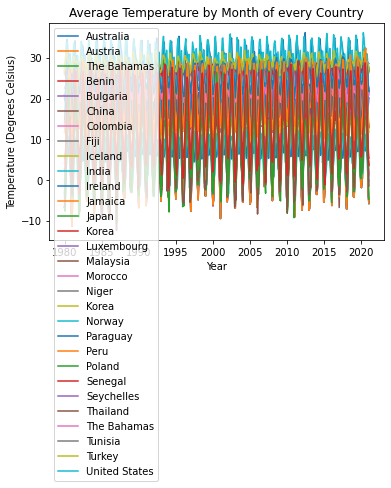

In [59]:
for country in filtered_countries:
    plt.plot(avg_temp_df.index, avg_temp_df[country])
    
plt.title('Average Temperature by Month of every Country')
plt.legend(filtered_countries)
plt.xlabel('Year')
plt.ylabel('Temperature (Degrees Celsius)')
plt.show()

## Create a DataFrame of Average Temperature by Year for all Countries

The temperature when plotted month by month is very noisy and difficult to work with. Therefore, it will be averaged across the year, as the pattern appears to be the same each year anyway for each country. 

In [60]:
# Copy the monthly average temp dataframe to a new variable name
yearly_weather = avg_temp_df.reset_index()

In [61]:
# Create a new column with the year extracted from the date
yearly_weather['year'] = pd.DatetimeIndex(yearly_weather['date']).year 

In [62]:
# Create a pivot table grouped by year and set this as the index
yearly_weather_pivot = pd.pivot_table(yearly_weather, index='year', aggfunc='mean')

In [63]:
# Convert the year to a list and convert back to datetime format, adding '-01-01'
dates = yearly_weather_pivot.index.tolist()
dates = [(str(i) + '-01-01') for i in dates]

In [64]:
# Save the newly created date series as the index 
yearly_weather_pivot.index = pd.DatetimeIndex(pd.Series(dates)) 

In [65]:
# The year 2021 is predictive so this must be dropped
yearly_weather_pivot = yearly_weather_pivot.drop(yearly_weather_pivot.tail(1).index)

In [66]:
yearly_weather_pivot.head()

,Australia,Austria,Benin,Bulgaria,China,Colombia,Fiji,Iceland,India,Ireland,...,Peru,Poland,Senegal,Seychelles,Thailand,The Bahamas,The Bahamas,Tunisia,Turkey,United States
1980-01-01,13.900000,8.983333,27.241667,9.200000,11.041667,13.600000,24.450000,4.350000,25.350000,9.666667,...,19.541667,6.575000,23.725000,27.033333,29.158333,24.150000,24.150000,18.975000,11.283333,13.450000
1981-01-01,13.791667,10.391667,27.333333,9.775000,12.333333,13.416667,24.208333,3.416667,25.233333,9.691667,...,19.108333,7.816667,24.375000,26.916667,28.383333,24.416667,24.416667,19.600000,12.333333,14.418182
1982-01-01,13.866667,10.166667,26.866667,9.533333,12.800000,13.566667,24.291667,3.950000,24.583333,9.975000,...,19.908333,8.291667,23.591667,27.366667,28.466667,25.116667,25.116667,20.108333,10.958333,14.233333
1983-01-01,13.525000,10.983333,26.925000,9.825000,12.983333,13.925000,24.325000,3.408333,24.150000,10.241667,...,22.925000,9.108333,24.575000,27.308333,28.775000,24.925000,24.925000,19.716667,10.658333,14.616667
1984-01-01,12.258333,9.591667,27.283333,9.683333,11.900000,12.791667,24.708333,4.025000,25.125000,9.958333,...,19.700000,7.908333,23.908333,26.472727,28.608333,24.433333,24.433333,19.316667,11.450000,14.316667


### Plot the average Yearly Temperature of Every Country

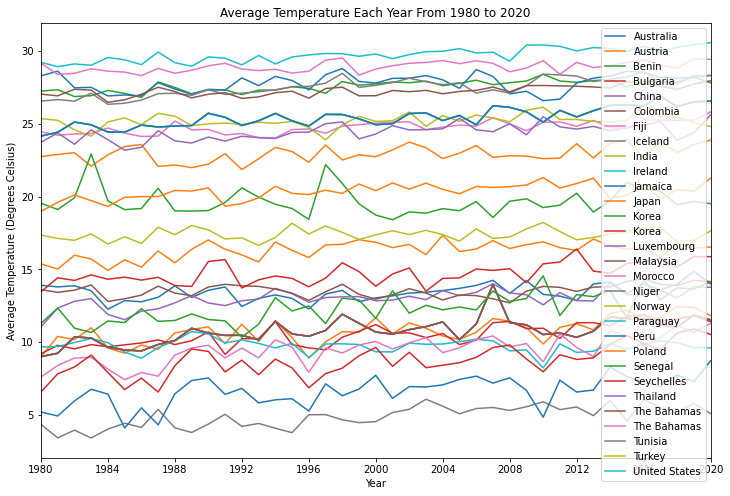

In [67]:
plt.figure(figsize=(12, 8))
for country in yearly_weather_pivot.columns:
    plt.plot(yearly_weather_pivot[country])
    low = dt.datetime.strptime('1980-01-01', '%Y-%m-%d')
    high = dt.datetime.strptime('2020-01-01', '%Y-%m-%d')
    plt.xlim([low, high])
plt.legend(yearly_weather_pivot.columns)
plt.xlabel('Year')
plt.ylabel('Average Temperature (Degrees Celsius)')
plt.title("Average Temperature Each Year From 1980 to 2020")
plt.show()

# Analysis

## Plot the Location of Filtered Countries on a World Map

Based on the list of filtered_countries, plot the location of the Country (using it's coordinates from the country_rows dataframe), including a pop-up label including the City name, Country name and average temperature of that country. 

This will help identify countries to analyse later on when only a few need to be compared. The countries further away from each other will likely be the most interesting comparison. 

Use the Folium Package to do this.

In [68]:
world = folium.Map(titles='cartodbpositron')
marker = MarkerCluster().add_to(world)
filtered_locations = location_info[location_info['Country'].isin(filtered_countries)]

for row in range(len(filtered_locations)):
    latitude = filtered_locations.iloc[row]['latitude']
    longitude = filtered_locations.iloc[row]['longitude']
    radius = 5
    city_country = filtered_locations.iloc[row]['location_name']
    country_name = filtered_locations.iloc[row]['Country']
    avg_temp = yearly_weather_pivot[country_name].mean()
    temp_format = "{:.2f}".format(avg_temp)
    pop_up = 'City Name: {} \nAverage Yearly Temperature: {} Degrees Celsius'.format(city_country, temp_format)
    folium.CircleMarker(location=[latitude, longitude], radius=radius, popup=pop_up, fill=True).add_to(marker)
    
world

## Plot Min and Max Average Monthly Temperatures

Find the maximum average monthly temperature each year and the minimum monthly temperature each year. Then plot these to find out if there's an extreme or noticable difference in how these change from the year 1980 to 2020. 

This is a suitable alternative for the minimum and maximum monthly temperatures which contain too many NaN values to be a reliable data source. 

In [69]:
# Create a new dataframe for years weather
yearly_weather = avg_temp_df.reset_index()
yearly_weather['year'] = pd.DatetimeIndex(yearly_weather['date']).year 

In [70]:
# Average maximum temperature by year
max_yearly = pd.pivot_table(yearly_weather, index='year', aggfunc='max')
dates = max_yearly.index.tolist()
dates = [(str(i) + '-01-01') for i in dates]
max_yearly.index = pd.DatetimeIndex(pd.Series(dates)) 
max_yearly = max_yearly.drop(columns='date')
max_yearly = max_yearly.drop(max_yearly.tail(1).index)

In [71]:
# Average minimum temperature by year
min_yearly = pd.pivot_table(yearly_weather, index='year', aggfunc='min')
dates = min_yearly.index.tolist()
dates = [(str(i) + '-01-01') for i in dates]
min_yearly.index = pd.DatetimeIndex(pd.Series(dates)) 
min_yearly = min_yearly.drop(columns='date')
min_yearly = min_yearly.drop(min_yearly.tail(1).index)

In [72]:
min_yearly.head()

,Australia,Austria,Benin,Bulgaria,China,Colombia,Fiji,Iceland,India,Ireland,...,Peru,Poland,Senegal,Seychelles,Thailand,The Bahamas,The Bahamas,Tunisia,Turkey,United States
1980-01-01,6.1,-3.1,25.4,-4.0,-4.5,12.4,21.9,-1.3,14.1,4.2,...,16.4,-6.3,20.3,26.1,26.8,19.5,19.5,10.5,-3.2,2.3
1981-01-01,5.7,-0.8,25.4,-3.2,-4.8,11.7,21.6,-2.2,15.0,3.2,...,16.3,-3.6,19.1,25.8,24.9,18.6,18.6,9.9,2.6,0.9
1982-01-01,4.7,-3.1,24.5,-1.7,-4.3,12.7,21.8,-1.6,14.5,5.1,...,17.0,-3.6,19.2,26.3,24.7,21.3,21.3,11.4,-0.2,-2.2
1983-01-01,5.1,-0.9,24.9,-0.8,-2.9,12.9,22.0,-2.2,13.5,3.7,...,18.0,-2.6,21.3,26.2,26.2,21.3,21.3,11.1,-3.6,2.2
1984-01-01,5.4,0.6,25.4,-0.5,-4.5,10.0,22.5,-4.0,13.4,4.1,...,17.2,-1.7,19.5,24.8,26.0,21.7,21.7,11.9,-1.1,0.1


In [73]:
max_yearly.head()

,Australia,Austria,Benin,Bulgaria,China,Colombia,Fiji,Iceland,India,Ireland,...,Peru,Poland,Senegal,Seychelles,Thailand,The Bahamas,The Bahamas,Tunisia,Turkey,United States
1980-01-01,20.7,19.2,29.0,19.7,26.3,14.3,27.0,10.8,34.5,15.3,...,23.5,16.6,27.2,28.1,31.7,28.0,28.0,27.0,24.9,28.2
1981-01-01,24.1,19.7,28.8,19.6,27.8,14.1,26.5,10.5,34.2,16.1,...,23.1,18.0,27.8,28.4,30.3,28.5,28.5,27.1,23.4,26.8
1982-01-01,22.5,20.6,28.9,19.6,25.8,13.9,27.4,10.7,33.1,15.7,...,24.6,19.2,27.8,28.3,30.4,28.3,28.3,29.3,21.3,26.8
1983-01-01,23.5,23.3,29.0,20.1,27.3,14.8,26.2,8.5,32.5,17.8,...,27.1,19.4,28.3,28.7,31.6,28.3,28.3,28.5,21.4,27.3
1984-01-01,18.9,18.8,29.2,18.6,26.9,13.8,26.3,11.2,34.9,16.9,...,23.2,18.0,27.6,28.0,31.0,27.5,27.5,27.6,21.5,25.2


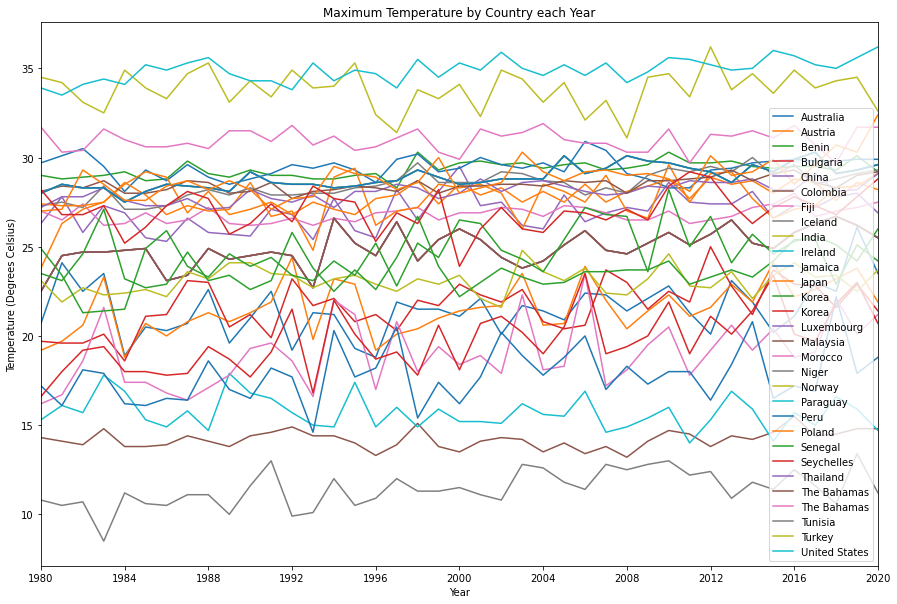

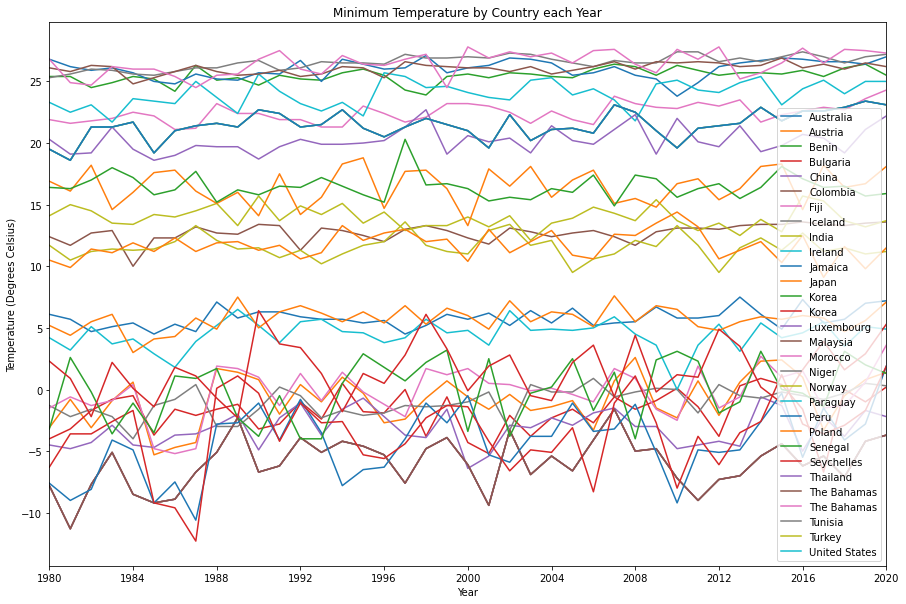

In [74]:
plt.figure(figsize=(15, 10))

# Maximum temperature
for country in max_yearly.columns:
    plt.plot(max_yearly[country])
    low = dt.datetime.strptime('1980-01-01', '%Y-%m-%d')
    high = dt.datetime.strptime('2020-01-01', '%Y-%m-%d')
    plt.xlim([low, high])
plt.title('Maximum Temperature by Country each Year')
plt.xlabel('Year')
plt.ylabel('Temperature (Degrees Celsius)')
plt.legend(max_yearly.columns)
plt.show()

# Minimum temperature
plt.figure(figsize=(15, 10))
for country in min_yearly.columns:
    plt.plot(min_yearly[country])
    plt.xlim([low, high])
plt.title('Minimum Temperature by Country each Year')
plt.xlabel('Year')
plt.ylabel('Temperature (Degrees Celsius)')
plt.legend(max_yearly.columns)
plt.show()

### Identify Correlations between Minimum and Maximum Temperatures

Find out the relationship between minimum temperature and maximum temperature across countries. Are they increasing with time? Is one decreasing with time and another increasing?

From plotting the below graphs it is evident there is very little correlation between the minimum temperature over time between each country. The same can be said for Maximum temperaturem although this is a slightly lighter heat map in general. However, from this we can almost confidently say there is not a significantly strong increase or decrease in maximum and minimum temperature over time. 

Countries with the strongest correlations are those which are located closer together, such as Austria, Poland and Luxembourg which are all in Europe. 

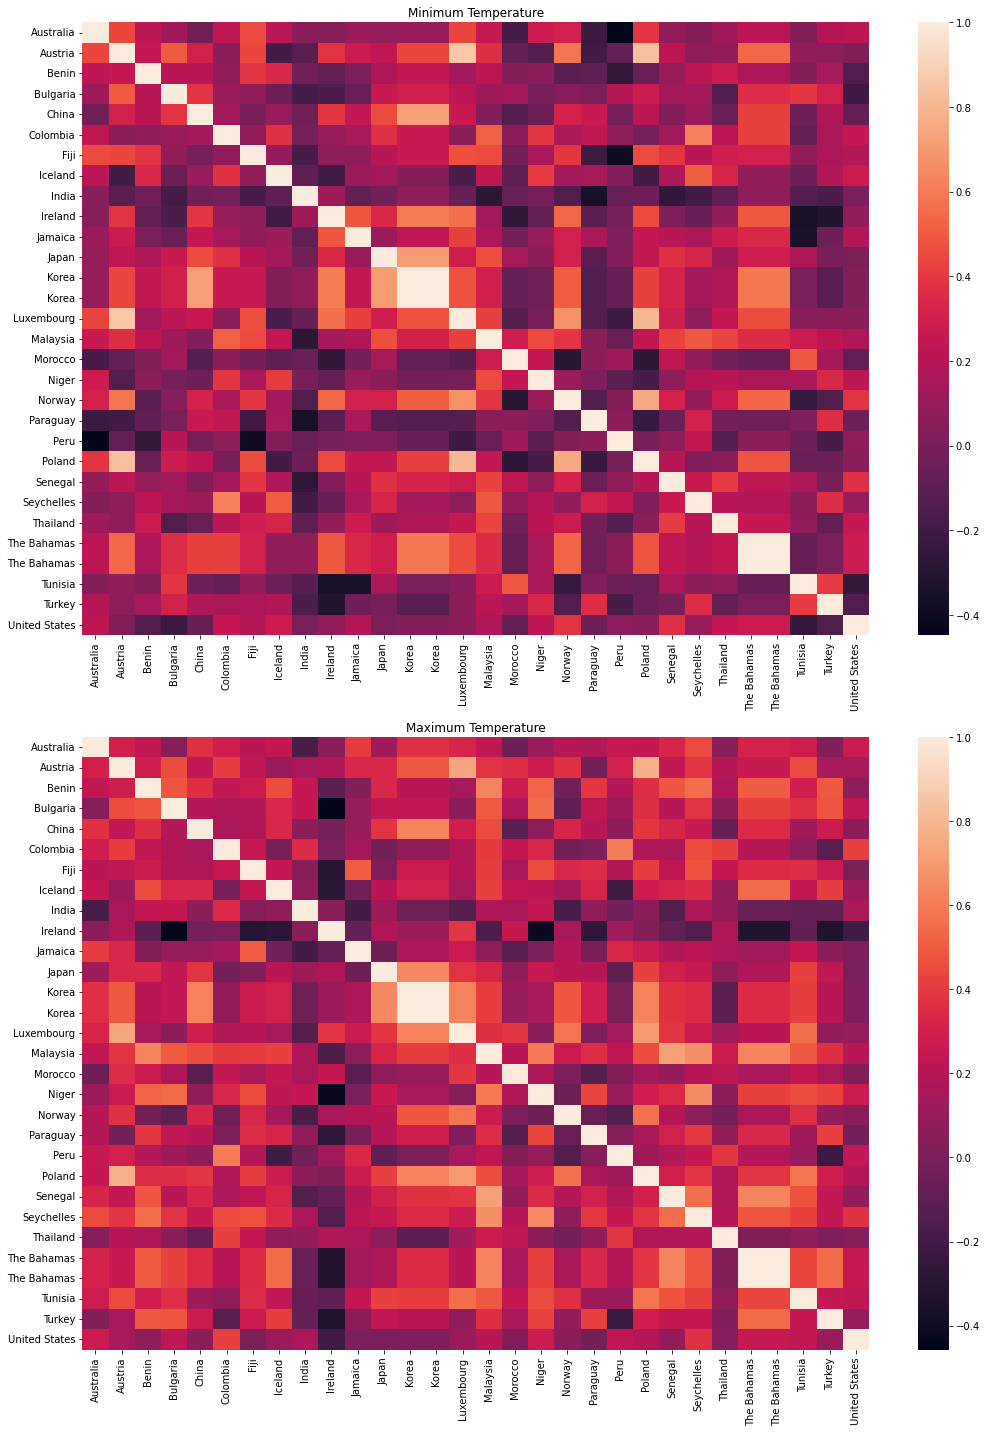

In [75]:
# Find the relationship between minimum temperature of each country with time
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,20))
sns.heatmap(min_yearly.corr(),annot=False, ax=ax1)
ax1.set_title('Minimum Temperature')
sns.heatmap(max_yearly.corr(),annot=False, ax=ax2) 
ax2.set_title('Maximum Temperature')
plt.tight_layout()
plt.show()

There are a few countries which appear to have a close relatioship between their minimum and maximum temperatures. The most noticeable of these is Poland, Austrai and Luxembourg. This is expected as they are all located in the same part of the world, very close to one another. They will be plotted to compare the correlations between these countries.

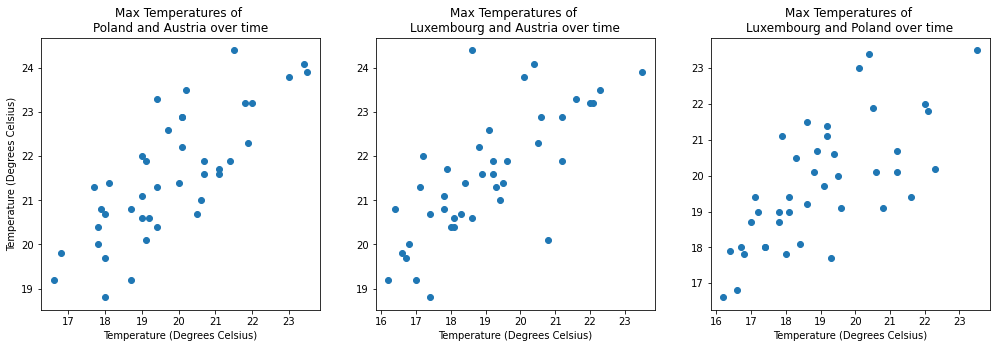

In [76]:
figure, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17, 5))

c1 = max_yearly['Poland']
c2 = max_yearly['Austria']
c3 = max_yearly['Luxembourg']

ax1.scatter(c1, c2)
ax1.set_xlabel('Temperature (Degrees Celsius)')
ax1.set_ylabel('Temperature (Degrees Celsius)')
ax1.set_title('Max Temperatures of \nPoland and Austria over time')
ax2.scatter(c3, c2)
ax2.set_xlabel('Temperature (Degrees Celsius)')
ax2.set_title('Max Temperatures of \nLuxembourg and Austria over time')
ax3.scatter(c3, c1)
ax3.set_xlabel('Temperature (Degrees Celsius)')
ax3.set_title('Max Temperatures of \nLuxembourg and Poland over time')
plt.show()

### Model Building

You can build a model to use Poland and Luxembourg temperatures to predict the temperature of Austria.

In [77]:
# Set the variables to build the model off
X = max_yearly[['Poland', 'Austria']] # our feature(s)
y = max_yearly['Luxembourg'] # our target variable

Split the data to avoid overfitting and to enable us to test the quality of the model with the dataset that was not used to train the model. 

Use SKLearn to build the model.

In [78]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5) 

In [79]:
# Find out how many samples we have for each training and test set
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32, 2)
(9, 2)
(32,)
(9,)


In [80]:
model = LinearRegression() # getting off the shelf (creating an object of LinearRegression class)

model.fit(X_train, y_train) # finding the best fit (param optim) for our data

LinearRegression()

In [81]:
# Find the coefficients and print eh equation generated from them
model.coef_
model.intercept_
equation = 'Equation: y = {:.2f} + {:.2f}*x1 + {:.2f}*x2'.format(model.intercept_, model.coef_[0], model.coef_[1])

print(equation)

Equation: y = 1.24 + 0.55*x1 + 0.32*x2


## Average Min and Average Max Temperature each Year Across all Years

Find the average maximum temperature across all 40 years from 1980 to 2020, and the average minimum, for each country. 

This will result in a Series for min and max temperatures with the Country name as the index. 

This is being averaged as there are such small differences in monthly temperature that it is not comparable to other variables. It will also mean that every country's weather can be compared to economic indicator data at the same time. 

Check the statistical data of the dataframes to find out if there are any outliers and whether averaging will be affected by large differences in maximum and minimum temperature each year.

In [82]:
min_yearly.describe()

,Australia,Austria,Benin,Bulgaria,China,Colombia,Fiji,Iceland,India,Ireland,...,Peru,Poland,Senegal,Seychelles,Thailand,The Bahamas,The Bahamas,Tunisia,Turkey,United States
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,...,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,5.807317,-0.775610,25.463415,-1.831707,-3.192683,12.734146,22.439024,-0.997561,13.960976,4.436585,...,16.460976,-3.553659,20.200000,26.058537,26.490244,21.460976,21.460976,11.687805,-0.060976,1.619512
std,0.748796,1.976586,0.571732,1.681285,1.405950,0.710848,0.770350,1.154012,0.857577,1.203486,...,0.982313,3.077263,1.014396,0.430102,0.957289,1.120687,1.120687,1.112024,2.446311,2.215425
min,4.500000,-5.300000,23.900000,-6.700000,-6.400000,10.000000,21.100000,-4.000000,12.100000,0.000000,...,14.900000,-12.300000,18.600000,24.800000,24.500000,18.600000,18.600000,9.100000,-4.000000,-2.300000
25%,5.400000,-2.100000,25.300000,-2.800000,-4.500000,12.400000,21.900000,-1.700000,13.400000,3.800000,...,15.800000,-5.100000,19.500000,25.800000,25.700000,21.000000,21.000000,11.100000,-1.900000,-0.100000
50%,5.700000,-0.700000,25.500000,-1.600000,-3.000000,12.900000,22.400000,-0.800000,13.800000,4.600000,...,16.400000,-3.100000,20.000000,26.100000,26.500000,21.400000,21.400000,11.700000,0.200000,1.600000
75%,6.200000,0.700000,25.700000,-0.600000,-2.200000,13.300000,23.000000,-0.200000,14.500000,5.200000,...,17.000000,-1.700000,20.700000,26.300000,27.300000,22.400000,22.400000,12.500000,2.200000,3.300000
max,7.500000,2.600000,26.400000,0.900000,-0.600000,13.600000,24.300000,0.900000,15.700000,6.500000,...,20.300000,1.900000,22.700000,26.900000,27.800000,23.400000,23.400000,14.400000,3.200000,6.400000


In [83]:
max_yearly.describe()

,Australia,Austria,Benin,Bulgaria,China,Colombia,Fiji,Iceland,India,Ireland,...,Peru,Poland,Senegal,Seychelles,Thailand,The Bahamas,The Bahamas,Tunisia,Turkey,United States
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,...,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,21.529268,21.565854,29.339024,21.682927,26.939024,14.195122,26.809756,11.431707,33.821951,15.685366,...,23.775610,19.758537,28.082927,28.487805,30.982927,28.900000,28.900000,28.841463,24.653659,27.034146
std,1.477878,1.424186,0.440952,1.350908,0.975930,0.496463,0.427086,1.020892,1.075758,0.924002,...,1.097675,1.704109,0.524834,0.382881,0.600792,0.645368,0.645368,1.057586,1.533476,1.083884
min,18.800000,18.800000,28.300000,18.600000,25.300000,13.200000,26.200000,8.500000,31.100000,14.000000,...,22.200000,16.600000,27.100000,27.700000,29.700000,27.500000,27.500000,27.000000,21.300000,23.900000
25%,20.700000,20.600000,29.000000,20.800000,26.200000,13.800000,26.500000,10.800000,33.200000,15.000000,...,23.000000,18.700000,27.700000,28.200000,30.600000,28.500000,28.500000,28.200000,23.600000,26.300000
50%,21.400000,21.400000,29.300000,21.700000,27.000000,14.200000,26.900000,11.300000,33.900000,15.600000,...,23.600000,19.400000,28.100000,28.500000,31.000000,28.800000,28.800000,28.700000,24.600000,27.100000
75%,22.500000,22.600000,29.700000,22.800000,27.500000,14.500000,27.200000,12.200000,34.500000,16.100000,...,24.200000,20.700000,28.400000,28.700000,31.500000,29.300000,29.300000,29.300000,25.600000,27.700000
max,26.100000,24.400000,30.300000,25.000000,29.500000,15.500000,28.000000,13.400000,36.200000,17.900000,...,27.100000,23.500000,29.100000,29.300000,31.900000,30.300000,30.300000,32.400000,28.200000,29.200000


Data from the year 2021 seems to be more extreme so this will be ignored when finding the averages.

In [84]:
min_all_time_avg = min_yearly.mean(axis=0)
max_all_time_avg = max_yearly.mean(axis=0)
avg_all_time = yearly_weather_pivot.mean(axis=0)
print(min_all_time_avg, max_all_time_avg, avg_all_time)

Australia         5.807317
Austria          -0.775610
Benin            25.463415
Bulgaria         -1.831707
China            -3.192683
Colombia         12.734146
Fiji             22.439024
Iceland          -0.997561
India            13.960976
Ireland           4.436585
Jamaica          26.014634
Japan             5.724390
Korea            -5.975610
Korea            -5.975610
Luxembourg       -0.200000
Malaysia         26.553659
Morocco          11.568293
Niger            23.992683
Norway           -4.309756
Paraguay         16.509756
Peru             16.460976
Poland           -3.553659
Senegal          20.200000
Seychelles       26.058537
Thailand         26.490244
The Bahamas      21.460976
The Bahamas      21.460976
Tunisia          11.687805
Turkey           -0.060976
United States     1.619512
dtype: float64 Australia        21.529268
Austria          21.565854
Benin            29.339024
Bulgaria         21.682927
China            26.939024
Colombia         14.195122
Fiji         

Create a new DataFrame with Countries as the index, and average min and average max temp as columns. Add a new column with the range in values. 

In [85]:
min_max_df = pd.DataFrame(columns=['Avg All Time', 'Avg Min Temp', 'Avg Max Temp', 'Range'])
min_max_df['Avg All Time'] = avg_all_time
min_max_df['Avg Min Temp'] = min_all_time_avg
min_max_df['Avg Max Temp'] = max_all_time_avg
min_max_df['Range'] = min_max_df['Avg Max Temp'] - min_max_df['Avg Min Temp']

In [86]:
min_max_df

,Avg All Time,Avg Min Temp,Avg Max Temp,Range
Australia,13.439024,5.807317,21.529268,15.721951
Austria,10.763211,-0.775610,21.565854,22.341463
Benin,27.592572,25.463415,29.339024,3.875610
Bulgaria,10.520528,-1.831707,21.682927,23.514634
China,12.970325,-3.192683,26.939024,30.131707
Colombia,13.537195,12.734146,14.195122,1.460976
Fiji,24.750684,22.439024,26.809756,4.370732
Iceland,4.868293,-0.997561,11.431707,12.429268
India,25.205229,13.960976,33.821951,19.860976
Ireland,9.744715,4.436585,15.685366,11.248780


Plot the average temperature of each country and the min and max by using an error-bar like graph.

In [87]:
# Get stats of averaging the temperatures by year
avg_all_time_stats = yearly_weather_pivot.describe().T
min_all_time_stats = min_yearly.describe().T
max_all_time_stats = max_yearly.describe().T

In [88]:
# Combine and sort the Stats with the order of increasing average temperatures
avg_all_time_stats['Values'] = min_max_df['Avg All Time']
min_all_time_stats['Values'] = min_max_df['Avg Min Temp']
max_all_time_stats['Values'] = min_max_df['Avg Max Temp']

In [89]:
# Add the original data points to the dataframes of statistics
avg_all_time_stats_sorted = avg_all_time_stats.sort_values('Values')
min_all_time_stats_sorted = min_all_time_stats.sort_values('Values')
max_all_time_stats_sorted = max_all_time_stats.sort_values('Values')

In [90]:
avg_all_time_stats_sorted.head()

,count,mean,std,min,25%,50%,75%,max,Values
Iceland,41.0,4.868293,0.734883,3.408333,4.350000,5.016667,5.433333,6.075000,4.868293
Norway,41.0,6.628714,1.027392,4.091667,6.108333,6.775000,7.358333,8.708333,6.628714
Poland,41.0,8.720325,1.076991,6.566667,7.958333,8.808333,9.491667,10.900000,8.720325
Luxembourg,41.0,9.472154,0.959795,7.416667,8.916667,9.608333,10.158333,11.283333,9.472154
Ireland,41.0,9.744715,0.444979,8.225000,9.516667,9.866667,9.958333,10.725000,9.744715


In [91]:
min_all_time_stats_sorted.head()

,count,mean,std,min,25%,50%,75%,max,Values
Korea,41.0,-5.975610,2.041664,-11.3,-7.2,-5.4,-4.6,-1.6,-5.975610
Korea,41.0,-5.975610,2.041664,-11.3,-7.2,-5.4,-4.6,-1.6,-5.975610
Norway,41.0,-4.309756,2.823987,-10.6,-5.9,-4.1,-2.7,1.9,-4.309756
Poland,41.0,-3.553659,3.077263,-12.3,-5.1,-3.1,-1.7,1.9,-3.553659
China,41.0,-3.192683,1.405950,-6.4,-4.5,-3.0,-2.2,-0.6,-3.192683


In [92]:
max_all_time_stats_sorted.head()

,count,mean,std,min,25%,50%,75%,max,Values
Iceland,41.0,11.431707,1.020892,8.5,10.8,11.3,12.2,13.4,11.431707
Colombia,41.0,14.195122,0.496463,13.2,13.8,14.2,14.5,15.5,14.195122
Ireland,41.0,15.685366,0.924002,14.0,15.0,15.6,16.1,17.9,15.685366
Norway,41.0,17.802439,1.554105,14.6,16.5,17.7,18.4,22.2,17.802439
Luxembourg,41.0,19.017073,1.821662,16.2,17.8,18.8,20.4,23.5,19.017073


### Plot Average, Minimum and Maximum Tmperatures of Each Country

/var/folders/d9/4z9p_zv53tscj0d5jwlhx4940000gq/T/ipykernel_68227/2307591297.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(avg_all_time_stats_sorted.index, rotation=90)
/var/folders/d9/4z9p_zv53tscj0d5jwlhx4940000gq/T/ipykernel_68227/2307591297.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(min_all_time_stats_sorted.index, rotation=90)
/var/folders/d9/4z9p_zv53tscj0d5jwlhx4940000gq/T/ipykernel_68227/2307591297.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(max_all_time_stats_sorted.index, rotation=90)


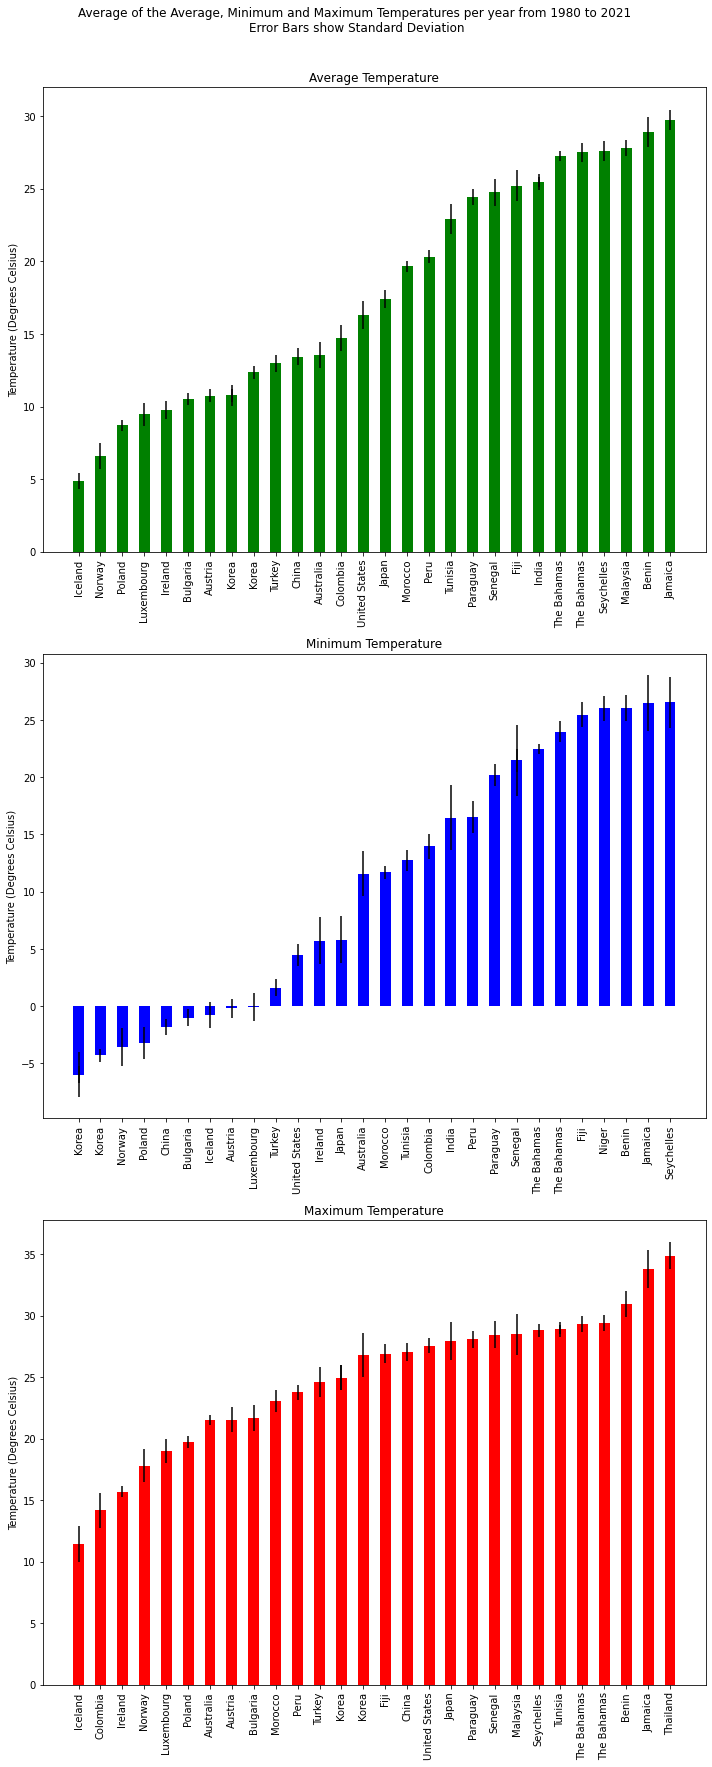

In [93]:
figure, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,25))

# Average Temperatures - All Time
ax1.set_xticklabels(avg_all_time_stats_sorted.index, rotation=90)
ax1.set_title('Average Temperature')
ax1.set_ylabel('Temperature (Degrees Celsius)')
ax1.bar(avg_all_time_stats_sorted.index, avg_all_time_stats_sorted['Values'], width=0.5, yerr=avg_all_time_stats['std'], color='g')

# Minimum Temperatures - All Time
ax2.set_xticklabels(min_all_time_stats_sorted.index, rotation=90)
ax2.set_title('Minimum Temperature')
ax2.set_ylabel('Temperature (Degrees Celsius)')
ax2.bar(min_all_time_stats_sorted.index, min_all_time_stats_sorted['Values'], width=0.5, yerr=min_all_time_stats['std'], color='b')

# Minimum Temperatures - All Time
ax3.set_xticklabels(max_all_time_stats_sorted.index, rotation=90)
ax3.set_title('Maximum Temperature')
ax3.set_ylabel('Temperature (Degrees Celsius)')
ax3.bar(max_all_time_stats_sorted.index, max_all_time_stats_sorted['Values'], width=0.5, yerr=max_all_time_stats['std'], color='r')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle('Average of the Average, Minimum and Maximum Temperatures per year from 1980 to 2021 \nError Bars show Standard Deviation')
plt.show()

### Plot Minimum and Maximum Temperatures on the Same Graph

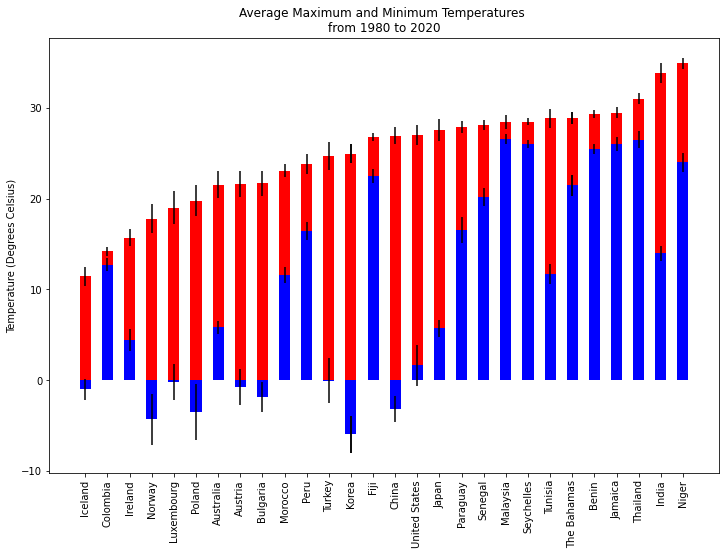

In [94]:
# Create a new dataframe that can be used to sort the maximum temperature in increasing order
new_avgs = min_max_df
new_avgs['max std'] = max_all_time_stats['std']
new_avgs['min std'] = min_all_time_stats['std']
new_avgs_sorted = new_avgs.sort_values('Avg Max Temp')

# Plot
plt.figure(figsize=(12, 8))
plt.bar(new_avgs_sorted.index, new_avgs_sorted['Avg Max Temp'], width=0.5, yerr=new_avgs_sorted['max std'], color='r')
plt.bar(new_avgs_sorted.index, new_avgs_sorted['Avg Min Temp'], width=0.5, yerr=new_avgs_sorted['min std'], color='b')
plt.xticks(rotation=90)
plt.ylabel('Temperature (Degrees Celsius)')
plt.title('Average Maximum and Minimum Temperatures \nfrom 1980 to 2020')
plt.show()

### Plot the Range Between Minimum and Maximum Temperature in a Bar Graph

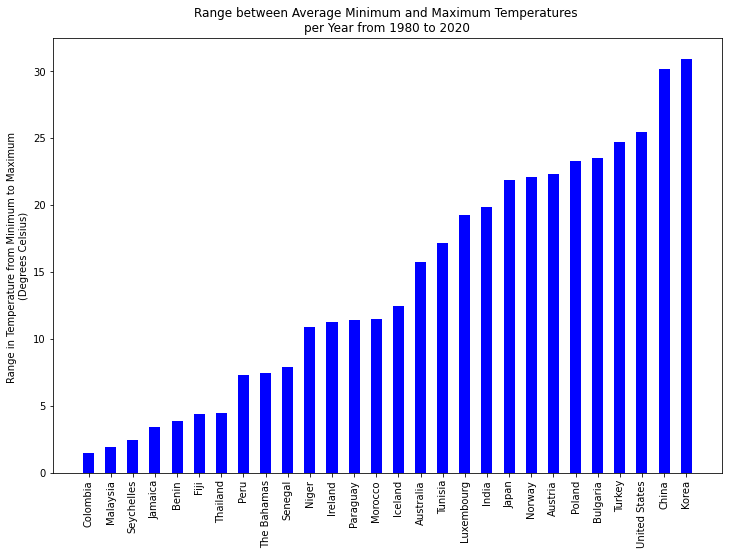

In [95]:
sorted_range = min_max_df.sort_values('Range') 

plt.figure(figsize=(12, 8))
plt.bar(sorted_range.index, sorted_range['Range'], color='b', width=0.5)
plt.xticks(rotation=90)
plt.ylabel('Range in Temperature from Minimum to Maximum \n(Degrees Celsius)')
plt.title('Range between Average Minimum and Maximum Temperatures \nper Year from 1980 to 2020')
plt.show()

From the graph above we can identify countries with the more extreme weather conditions. This will be an interesting comparison to Economic Indicators later on to see how these might be affected by Temperature.

## Histogram of Temperatures

A histogram is used to see the distribution in average temperature. From the bar charts above it is evident there is a fairly linear trend and there is not a specific temperature lots of countries have. 

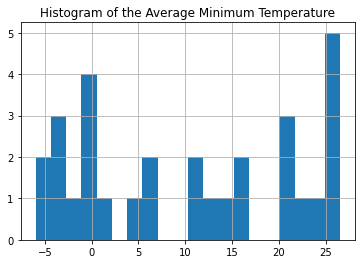

In [96]:
min_max_df['Avg Min Temp'].hist(bins=20)
plt.title('Histogram of the Average Minimum Temperature')
plt.show()

/Users/sophiecoding/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


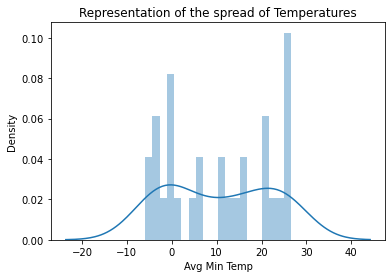

In [97]:
sns.distplot(min_max_df['Avg Min Temp'], bins=20)
plt.title('Representation of the spread of Temperatures')
plt.show()

## Function to Extract a WEO Indicator from the Code and Country

Inputs: WEO Subject Code and Country Name

In [98]:
# Function to input the Country name and the Subject Code, and output a DataFrame with that data
def one_ind_one_country(WEO_code_, country_):
    # Load the GDP .csv file
    path_directory = os.path.join('./data', WEO_code_ + '.csv')
    gdp_df = pd.read_csv(path_directory, header=0, index_col='Country')
    gdp_df.reset_index()

    # Create a list of years to plot the data from and select the data from those columns
    years = [str(i) for i in range(1980, 2021)]
    gdp_df = gdp_df[years]

    # Transpose the dataframe so the country name is along the column names
    aus_gdp = gdp_df[gdp_df.index == country_.title()].T
    aus_gdp.index = pd.DatetimeIndex(aus_gdp.index)
    return aus_gdp

## Functions to Plot Line Graphs with 2 Time Series Variables

two_axis_plot_auto_lim: Sets the y limit to auto

two_axis_plot: Set your own y limit for var2

In [99]:
def two_axis_plot_auto_lim(var1, var2, title1, title2, title_):
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.set_xlabel('Year')
    ax1.set_ylabel(title1, color=color)

    ax1.plot(var1, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # Create a new axis that shares the same x axis

    color = 'tab:blue'
    ax2.set_ylabel(title2, color=color)  # ax1 set x axis parameters
    ax2.plot(var2, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    low = dt.datetime.strptime('1980-01-01', '%Y-%m-%d')
    high = dt.datetime.strptime('2020-01-01', '%Y-%m-%d')
    plt.xlim([low, high])
    plt.title(title_)
    plt.show()

In [100]:
def two_axis_plot(var1, var2, title1, title2, title_, ylim2_):
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.set_xlabel('Year')
    ax1.set_ylabel(title1, color=color)

    ax1.plot(var1, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel(title2, color=color)  # we already handled the x-label with ax1
    ax2.plot(var2, color=color)
    ax2.set_ylim(ylim2_)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    low = dt.datetime.strptime('1980-01-01', '%Y-%m-%d')
    high = dt.datetime.strptime('2020-01-01', '%Y-%m-%d')
    plt.xlim([low, high])
    plt.title(title_)
    plt.show()

# Testing Functions

### Test the Functions Above using Australia as the Country

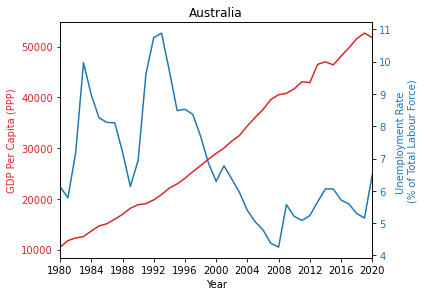

In [110]:
# Test the above functions to plot Austria GDP alongside Unemployment
gdp = 'PPPPC'
unemployment = 'LUR' 
country = 'Australia'
title_1 = 'GDP Per Capita (PPP)'
title_2 = 'Unemployment Rate \n(% of Total Labour Force)'
title = country

gdp_var = one_ind_one_country(gdp, country)
unemployment_var = one_ind_one_country(unemployment, country)

two_axis_plot_auto_lim(gdp_var, unemployment_var, title_1, title_2, title)

# Further Processing

## Put GDP of all Countries in a DataFrame

Create a DataFrame with the GDP of every country. Columns are labelled as Country Names and the index is the date by years. 

In [102]:
# Print the gdp of one country to see how to format comes out
gdp_var

Country,Austria
1980-01-01,11227.04
1981-01-01,12252.31
1982-01-01,13240.95
1983-01-01,14187.11
1984-01-01,14746.34
1985-01-01,15543.38
1986-01-01,16210.52
1987-01-01,16868.12
1988-01-01,17608.35
1989-01-01,18965.09


In [123]:
# Remove duplictes from filtered_countries
filtered_countries = list(set(filtered_countries))
filtered_countries

['Colombia',
 'Peru',
 'Korea',
 'Ireland',
 'Paraguay',
 'United States',
 'Morocco',
 'Norway',
 'Iceland',
 'Tunisia',
 'The Bahamas',
 'Niger',
 'Fiji',
 'Turkey',
 'Malaysia',
 'Senegal',
 'Austria',
 'Thailand',
 'Australia',
 'Japan',
 'Benin',
 'Jamaica',
 'Seychelles',
 'Luxembourg',
 'India',
 'Poland',
 'China',
 'Bulgaria']

In [125]:
# A for loop goes through every country and extracts the GDP per Capita and adds it to a new DataFrame
gdp_df = pd.DataFrame(columns=filtered_countries)

code = 'PPPPC'

for country in filtered_countries:
    gdp = one_ind_one_country(code, country)
    gdp_df[country] = gdp
    
    
gdp_df

,Colombia,Peru,Korea,Ireland,Paraguay,United States,Morocco,Norway,Iceland,Tunisia,...,Australia,Japan,Benin,Jamaica,Seychelles,Luxembourg,India,Poland,China,Bulgaria
1980-01-01,2840.64,3106.40,2169.38,7370.98,3532.89,12552.94,1491.88,14799.83,10927.45,2132.03,...,10493.28,9147.01,984.882,2911.31,4384.46,15658.59,532.041,4823.83,306.733,5338.21
1981-01-01,3110.90,3498.01,2507.26,8169.18,4099.00,13948.70,1547.53,16399.92,12342.04,2395.13,...,11771.25,10358.12,1062.020,3269.02,4557.45,17224.76,603.174,4709.82,348.055,6134.77
1982-01-01,3262.85,3613.26,2839.93,8711.00,4166.67,14404.99,1755.36,17388.85,13222.39,2470.70,...,12302.17,11283.02,1112.430,3518.08,4711.02,18464.03,647.450,4715.15,396.553,6767.96
1983-01-01,3371.19,3324.46,3296.93,8924.55,4076.02,15513.68,1771.89,18733.86,13253.10,2625.04,...,12563.47,12054.51,1097.190,3732.96,4871.24,19549.05,705.288,5101.66,450.585,7225.85
1984-01-01,3534.89,3492.97,3730.05,9475.35,4215.83,17086.44,1871.10,20527.72,14125.77,2842.64,...,13671.85,12967.15,1106.490,3895.64,5233.29,21195.18,741.444,5221.26,530.856,7817.26
1985-01-01,3785.59,3595.42,4108.97,9934.35,4386.16,18199.32,2004.69,22281.10,14915.26,2999.77,...,14664.85,13989.80,1152.740,3923.15,5906.39,23044.84,787.088,5552.70,612.806,8203.70
1986-01-01,4003.66,4019.77,4620.32,10175.62,4348.26,19034.77,2163.67,23564.58,16063.04,2902.81,...,15100.16,14667.89,1170.770,4244.13,6033.50,25736.43,822.810,5826.41,668.430,8815.21
1987-01-01,4234.27,4339.67,5284.70,10788.96,4494.67,20000.97,2110.73,24428.71,17724.07,3107.47,...,15977.40,15666.27,1139.490,4650.16,6214.62,27237.51,857.659,6076.88,752.552,9470.47
1988-01-01,4468.16,3981.21,6067.21,11555.75,4775.30,21376.00,2358.83,25091.68,18080.51,3165.48,...,16942.12,17246.02,1181.810,4594.84,6751.22,30322.77,952.714,6491.66,852.879,10066.60
1989-01-01,4704.32,3506.79,6684.64,12759.73,5089.74,22814.08,2452.33,26269.03,18512.22,3314.74,...,18149.18,18719.64,1158.910,4989.69,7691.51,34260.36,1027.050,6996.41,909.800,10454.80


### Identify Correlations between Different Countries GDP

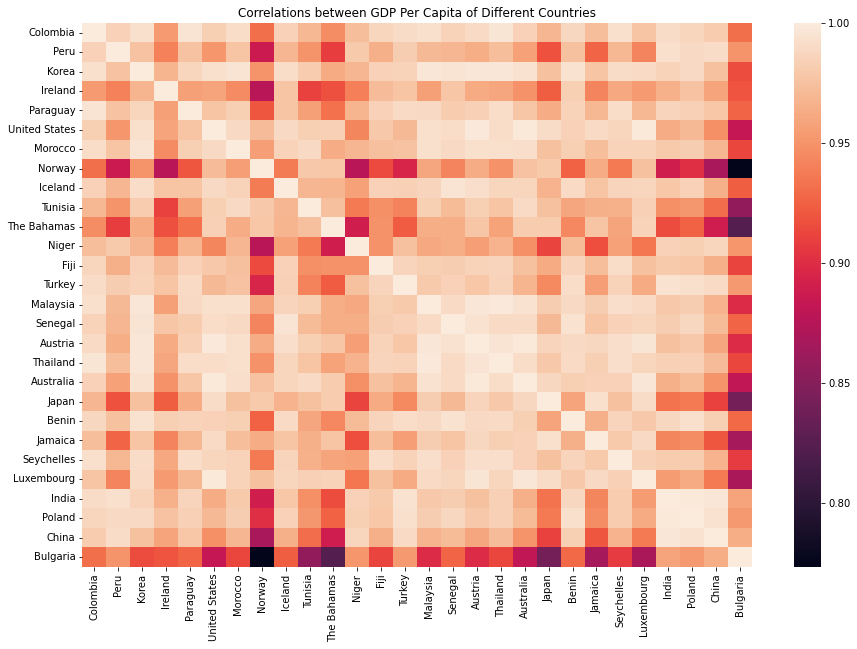

In [126]:
plt.figure(figsize=(15,10))
sns.heatmap(gdp_df.corr(),annot=False)
plt.title('Correlations between GDP Per Capita of Different Countries')

plt.show()

Almost every country has a strong correlation between their GDP over time with each other. This shows there are global trends in whether GDP is increasing or decreasing. Therefore, the average GDP of each country will be compared with weather rather than the GDP itself.

## Function to Access Economic Indicator Data

In [127]:
# Function to input the Country name and output a DataFrame with the Economic data
def country_econ_data(country_):
    # Load the GDP .csv file
    directory = os.path.join('./country', country_ + '.csv')
    econ_df = pd.read_csv(directory, header=0, index_col='WEO Subject Code')

    # Create a list of years to plot the data from and select the data from those columns
    years = [str(i) for i in range(1980, 2021)]
    econ_df = econ_df[years]

    # Transpose the dataframe so the country name is along the column names
    economic_df = econ_df.T
    economic_df.index = pd.DatetimeIndex(economic_df.index)
    return economic_df

## Analyse Economic Indicators of One Country

In [128]:
country = 'Australia'
aus_econ_data = country_econ_data(country)
aus_econ_data.head()

WEO Subject Code,NGDP_R,NGDP_RPCH,NGDP,NGDPD,PPPGDP,NGDP_D,NGDPRPC,NGDPRPPPPC,NGDPPC,NGDPDPC,...,TM_RPCH,TMG_RPCH,TX_RPCH,TXG_RPCH,LUR,LE,LP,NGDP_FY,BCA,BCA_NGDPD
1980-01-01,597.803,2.894,142.717,162.628,155.319,23.874,40387.34,26449.79,9641.88,10987.05,...,4.997,6.011,-0.915,16.399,6.133,6.287,14.802,142.717,-3.856,-2.371
1981-01-01,622.475,4.127,163.634,188.067,177.030,26.288,41390.27,27106.61,10880.54,12505.14,...,10.042,9.880,-3.403,2.533,5.783,6.416,15.039,163.634,-7.643,-4.064
1982-01-01,622.866,0.063,183.517,186.709,188.086,29.463,40739.78,26680.61,12003.27,12212.05,...,5.460,4.947,8.771,2.816,7.183,6.418,15.289,183.517,-7.681,-4.114
1983-01-01,619.916,-0.474,198.531,179.151,194.526,32.026,40037.24,26220.51,12822.14,11570.45,...,-9.819,-12.212,-4.360,8.826,9.967,6.301,15.483,198.531,-5.648,-3.153
1984-01-01,659.256,6.346,223.718,196.777,214.337,33.935,42051.68,27539.77,14270.23,12551.72,...,22.058,22.765,16.092,1.653,8.967,6.494,15.677,223.718,-8.175,-4.154


Identify missing data from the Australia GDP plot.

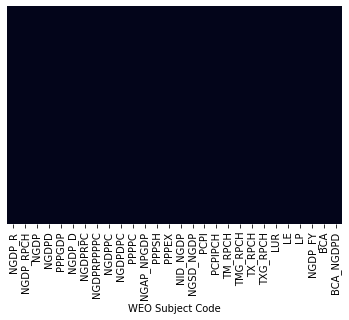

In [129]:
sns.heatmap(aus_econ_data.isnull(),cbar=False,yticklabels=False)
plt.show()

In [130]:
# Count nan values for each subject code and print those with nan values in the column
aus_nan_count = aus_econ_data.isna().sum()
nan_cols = aus_nan_count[aus_nan_count > 0]
print(nan_cols)

Series([], dtype: int64)


In [131]:
# print the subject descriptors
for i in nan_cols.index:
    print(i + ' = ' + codes_and_keys.loc[i, 'Subject Descriptor'])
    print('                ' + 'Units: ' + codes_and_keys.loc[i, 'Units'])

In [132]:
# Drop all columns with NaN values in them 
filtered_econ = aus_econ_data.dropna(axis=1)
filtered_econ

WEO Subject Code,NGDP_R,NGDP_RPCH,NGDP,NGDPD,PPPGDP,NGDP_D,NGDPRPC,NGDPRPPPPC,NGDPPC,NGDPDPC,...,TM_RPCH,TMG_RPCH,TX_RPCH,TXG_RPCH,LUR,LE,LP,NGDP_FY,BCA,BCA_NGDPD
1980-01-01,597.803,2.894,142.717,162.628,155.319,23.874,40387.34,26449.79,9641.88,10987.05,...,4.997,6.011,-0.915,16.399,6.133,6.287,14.802,142.717,-3.856,-2.371
1981-01-01,622.475,4.127,163.634,188.067,177.030,26.288,41390.27,27106.61,10880.54,12505.14,...,10.042,9.880,-3.403,2.533,5.783,6.416,15.039,163.634,-7.643,-4.064
1982-01-01,622.866,0.063,183.517,186.709,188.086,29.463,40739.78,26680.61,12003.27,12212.05,...,5.460,4.947,8.771,2.816,7.183,6.418,15.289,183.517,-7.681,-4.114
1983-01-01,619.916,-0.474,198.531,179.151,194.526,32.026,40037.24,26220.51,12822.14,11570.45,...,-9.819,-12.212,-4.360,8.826,9.967,6.301,15.483,198.531,-5.648,-3.153
1984-01-01,659.256,6.346,223.718,196.777,214.337,33.935,42051.68,27539.77,14270.23,12551.72,...,22.058,22.765,16.092,1.653,8.967,6.494,15.677,223.718,-8.175,-4.154
1985-01-01,695.228,5.456,248.383,174.067,233.179,35.727,43723.45,28634.62,15621.04,10947.21,...,3.790,5.805,10.397,14.528,8.258,6.701,15.901,248.383,-8.478,-4.871
1986-01-01,712.247,2.448,270.016,181.147,243.698,37.910,44132.70,28902.64,16730.89,11224.32,...,-3.149,-2.008,3.625,6.532,8.117,6.974,16.139,270.016,-9.163,-5.058
1987-01-01,747.095,4.893,303.502,212.712,261.944,40.624,45569.47,29843.59,18512.28,12974.46,...,2.516,1.316,12.119,11.568,8.108,7.128,16.395,303.502,-7.223,-3.396
1988-01-01,778.871,4.253,345.105,270.594,282.715,44.308,46675.09,30567.66,20680.97,16215.80,...,21.000,30.800,7.300,3.900,7.208,7.391,16.687,345.105,-10.407,-3.846
1989-01-01,814.889,4.624,388.380,307.720,307.388,47.660,48113.74,31509.83,22931.24,18168.82,...,21.162,20.738,3.292,3.657,6.133,7.718,16.937,388.380,-18.534,-6.023


### Heatmap of Correlations

Create Heat Maps of the correlations between economic indicators of Australia, selected above. 

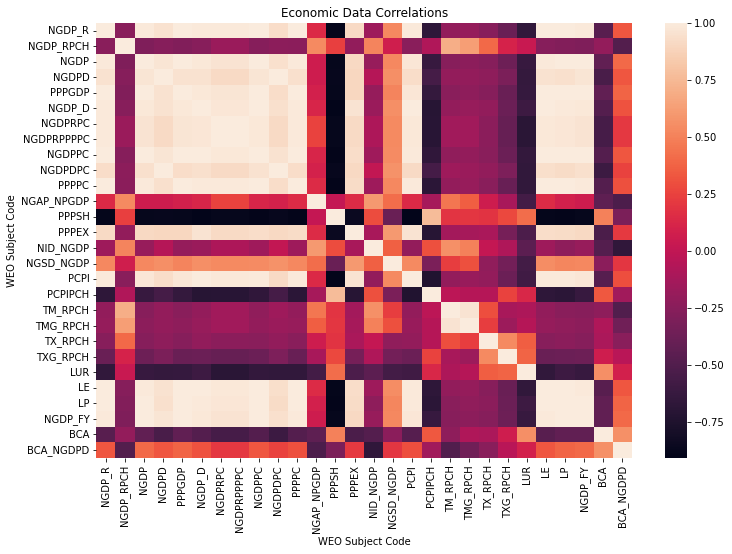

In [133]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))
sns.heatmap(filtered_econ.corr(),annot=False, ax=ax1)
ax1.set_title('Economic Data Correlations')

plt.show()

Many of the variables in the WEO data spreadsheet are the same but with different units. This is why some of them have such strong correlations. Therefore the variables will be filtered further, taking forwards the most significant with the most useful variables. 

In [134]:
filtered_indicators = ['PPPPC', 'LUR', 'LP', 'BCA_NGDPD', 'PCPIPCH']
filtered_econ_ind = filtered_econ[filtered_indicators]

In [135]:
filtered_econ_ind.head()

WEO Subject Code,PPPPC,LUR,LP,BCA_NGDPD,PCPIPCH
1980-01-01,10493.28,6.133,14.802,-2.371,10.136
1981-01-01,11771.25,5.783,15.039,-4.064,9.488
1982-01-01,12302.17,7.183,15.289,-4.114,11.352
1983-01-01,12563.47,9.967,15.483,-3.153,10.039
1984-01-01,13671.85,8.967,15.677,-4.154,3.960


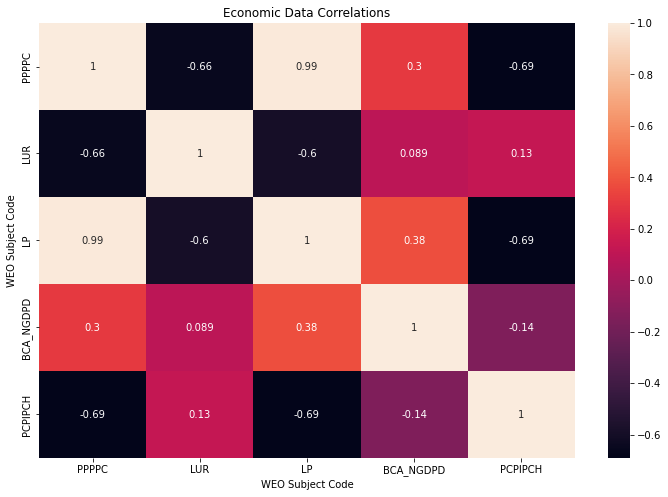

In [136]:
# Identify correlations between filtered variables of Australia
fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))
sns.heatmap(filtered_econ_ind.corr(),annot=True, ax=ax1)
ax1.set_title('Economic Data Correlations')
plt.show()

There are strong correlations between LP (Population) and PPPPC (GDP Per Capita). Similarly, there is a strong negative correlation between GDP Per Capita and PCPIPCH (Inflation), as well as GDP and LUR (unemployment). Population and Unemployment have a relatively strong negative correlation, and Population and Inflation have a negative correlation. 

The following plots are for GDP Per Capita, based on Population, Inflation and Unemployment.

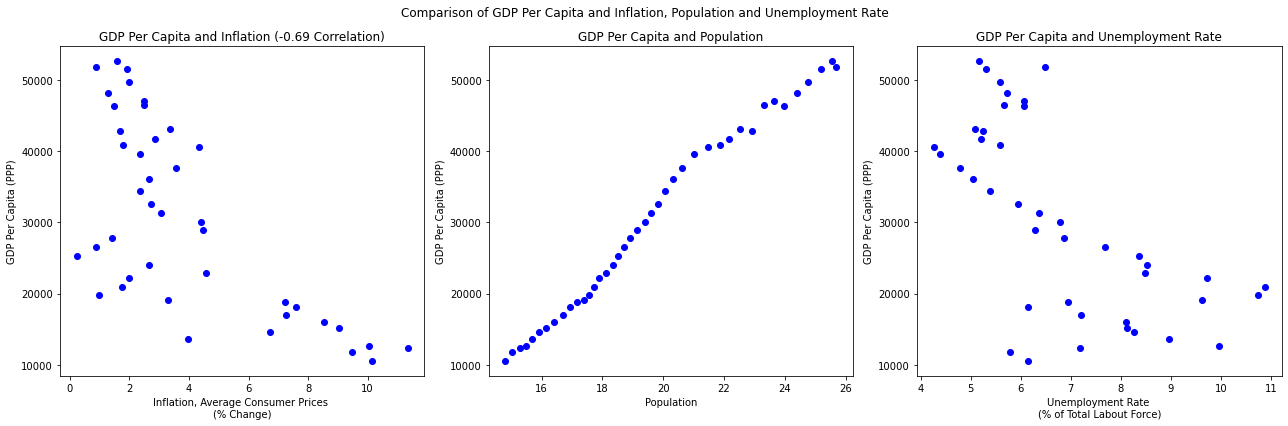

In [137]:
y = filtered_econ_ind['PPPPC']  # GDP Per Capita (PPP)
x1 = filtered_econ_ind['PCPIPCH']  # Inflation, Average Consumer Prices (% Change)
x2 = filtered_econ_ind['LP']  # Population 
x3 = filtered_econ_ind['LUR']  # Unemployment Rate (% of Total Labout Force)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

ax1.scatter(x1, y, color='b')
ax1.set_title('GDP Per Capita and Inflation (-0.69 Correlation)')
ax1.set_xlabel('Inflation, Average Consumer Prices \n(% Change)')
ax1.set_ylabel('GDP Per Capita (PPP)')

ax2.scatter(x2, y, color='b')
ax2.set_title('GDP Per Capita and Population')
ax2.set_xlabel('Population')
ax2.set_ylabel('GDP Per Capita (PPP)')

ax3.scatter(x3, y, color='b')
ax3.set_title('GDP Per Capita and Unemployment Rate')
ax3.set_xlabel('Unemployment Rate \n(% of Total Labout Force)')
ax3.set_ylabel('GDP Per Capita (PPP)')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle('Comparison of GDP Per Capita and Inflation, Population and Unemployment Rate')
plt.show()

## Create Model 1

Let's create a model to predict GDP Per Capita (in Australia) and compare test this model. 

In [138]:
# Select variables to base the model off
allx = filtered_econ_ind[['PCPIPCH', 'LP', 'LUR']]
y = filtered_econ_ind['PPPPC']

In [139]:
# Build training and test sets
x_train, x_test, y_train, y_test = train_test_split(allx, y, test_size=0.2, random_state=5)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(32, 3)
(9, 3)
(32,)
(9,)


In [140]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [141]:
# Find the equation
model.coef_
model.intercept_
equation = 'Equation: y = {:.2f} + {:.2f}*x1 + {:.2f}*x2 + {:.2f}*x3'.format(model.intercept_, model.coef_[0], model.coef_[1], model.coef_[2])

print(equation)

Equation: y = -30199.09 + -429.44*x1 + 3529.72*x2 + -1072.40*x3


### Test the model


In [142]:
y_predict = model.predict(x_test)

maerr = mean_absolute_error(y_test, y_predict)
rmse = (np.sqrt(mean_squared_error(y_test, y_predict)))
r2 = r2_score(y_test, y_predict)

print('MAE = ' + str(maerr))
print('RMSE = ' + str(rmse))
print('R2 = ' + str(r2))

MAE = 953.7154510947362
RMSE = 1293.7609514714072
R2 = 0.989218458108166


The R2 value seems a little too perfect. It is likely this is because population has been increasing for the past 20 years and so has GDP. However, if population were to decrease, would GDP continue to increase? There are not enough changes in the pattern of population to be confident that this has an impact on GDP. Therefore A new model will be built and tested excluding population. 

## Create Model 2

In [143]:
allx_2 = filtered_econ_ind[['PCPIPCH', 'LUR']]
y = filtered_econ_ind['PPPPC']

In [144]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(allx_2, y, test_size=0.2, random_state=5)

print(x_train_2.shape)
print(x_test_2.shape)
print(y_train_2.shape)
print(y_test_2.shape)

(32, 2)
(9, 2)
(32,)
(9,)


In [145]:
model_2 = LinearRegression()
model_2.fit(x_train_2, y_train_2)

LinearRegression()

### Test the Model

In [146]:
y_predict = model.predict(x_test)

maerr = mean_absolute_error(y_test, y_predict)
rmse = (np.sqrt(mean_squared_error(y_test, y_predict)))
r2 = r2_score(y_test, y_predict)

print('MAE = ' + str(maerr))
print('RMSE = ' + str(rmse))
print('R2 = ' + str(r2))

MAE = 953.7154510947362
RMSE = 1293.7609514714072
R2 = 0.989218458108166


## Calculate the Mean GDP from 1980 to 2020

For every country, calculate the mean GDP and save this to a dataframe. 

In [147]:
mean_alltime_gdp = gdp_df.mean(axis=0)
mean_alltime_gdp

Colombia          8118.804878
Peru              6642.232439
Korea            19593.638780
Ireland          34694.173415
Paraguay          7560.125122
United States    36838.346829
Morocco           4379.114146
Norway           44130.656585
Iceland          31031.556585
Tunisia           6451.860000
The Bahamas      26022.068780
Niger              894.144732
Fiji              7130.581951
Turkey           13376.178049
Malaysia         14128.031463
Senegal           2117.442439
Austria          32179.980244
Thailand          8853.078780
Australia        30302.500976
Japan            27523.958537
Benin             1910.041024
Jamaica           6860.890488
Seychelles       14383.484634
Luxembourg       64830.118537
India             2697.472878
Poland           14579.616829
China             5339.210341
Bulgaria         11718.085854
dtype: float64

In [148]:
# Create a new DataFrame to compare temperature with GDP
gdp_and_temp = min_max_df
gdp_and_temp['GDP'] = mean_alltime_gdp

In [149]:
gdp_and_temp.head()

,Avg All Time,Avg Min Temp,Avg Max Temp,Range,max std,min std,GDP
Australia,13.439024,5.807317,21.529268,15.721951,1.477878,0.748796,30302.500976
Austria,10.763211,-0.775610,21.565854,22.341463,1.424186,1.976586,32179.980244
Benin,27.592572,25.463415,29.339024,3.875610,0.440952,0.571732,1910.041024
Bulgaria,10.520528,-1.831707,21.682927,23.514634,1.350908,1.681285,11718.085854
China,12.970325,-3.192683,26.939024,30.131707,0.975930,1.405950,5339.210341


## Plot Average GDP Per Capita in a Bar Chart

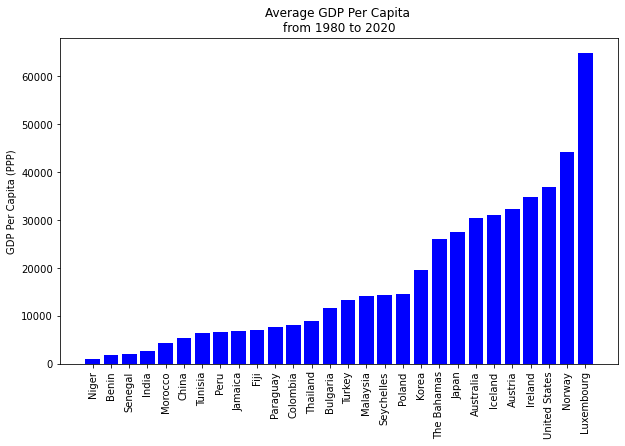

In [150]:
sort_by_gdp = gdp_and_temp.sort_values('GDP')

plt.figure(figsize=(10, 6))
plt.bar(sort_by_gdp.index, sort_by_gdp['GDP'], color='b')
plt.xticks(rotation=90)
plt.title('Average GDP Per Capita \nfrom 1980 to 2020')
plt.ylabel('GDP Per Capita (PPP)')

plt.show()

## Determine whether region has an impact on GDP

In [151]:
country_rows.head()

,S.No.,Country,Capital,Continent,location_name,latitude,longitude,station_id
0,1,Afghanistan,Kabul,Asia,"Kabul, Afghanistan",34.5260109,69.1776838,40948
1,2,Albania,Tirana,Europe,"Tirana, Albania",41.3279485,19.8185512,13601
2,3,Algeria,Algiers,Africa,"Algiers, Algeria",36.7753606,3.0601882,60369
3,4,American Samoa (USA),Pago Pago,Oceania,"Pago Pago, American Samoa (USA)",-14.2754786,-170.7048298,91765
4,5,Andorra,Andorra La Vella,Europe,"Andorra La Vella, Andorra",42.5069391,1.5212467,LESU0


In [152]:
# Add continent to the gdp_and_temp dataframe
gdp_and_temp['Continent'] = gdp_and_temp.index.to_series().map(country_rows.set_index('Country')['Continent'])

In [153]:
gdp_and_temp.head()

,Avg All Time,Avg Min Temp,Avg Max Temp,Range,max std,min std,GDP,Continent
Australia,13.439024,5.807317,21.529268,15.721951,1.477878,0.748796,30302.500976,Oceania
Austria,10.763211,-0.775610,21.565854,22.341463,1.424186,1.976586,32179.980244,Europe
Benin,27.592572,25.463415,29.339024,3.875610,0.440952,0.571732,1910.041024,Africa
Bulgaria,10.520528,-1.831707,21.682927,23.514634,1.350908,1.681285,11718.085854,Europe
China,12.970325,-3.192683,26.939024,30.131707,0.975930,1.405950,5339.210341,Asia


In [154]:
# Sort the dataframe by continent
sort_by_continent = gdp_and_temp.sort_values('Continent')
sort_by_continent.tail()

,Avg All Time,Avg Min Temp,Avg Max Temp,Range,max std,min std,GDP,Continent
Peru,19.650813,16.460976,23.775610,7.314634,1.097675,0.982313,6642.232439,South America
Korea,10.767480,-5.975610,24.965854,30.941463,0.998151,2.041664,19593.638780,NaN
Korea,10.767480,-5.975610,24.965854,30.941463,0.998151,2.041664,19593.638780,NaN
The Bahamas,25.438341,21.460976,28.900000,7.439024,0.645368,1.120687,26022.068780,NaN
The Bahamas,25.438341,21.460976,28.900000,7.439024,0.645368,1.120687,26022.068780,NaN


In [155]:
# Fill in the NaN values
sort_by_continent.loc['The Bahamas', 'Continent'] = 'North America'
sort_by_continent.loc['Korea', 'Continent'] = 'Asia'

In [156]:
# Group by continent and aggregate by calculating the mean and standard deviation of every column
grouped_continents = sort_by_continent.groupby(['Continent'], as_index=False).agg(
                      {'Avg All Time':['mean','std'],'Avg Min Temp':['mean','std'], 'Avg Max Temp':['mean','std'], 'GDP':['mean','std']})

In [157]:
# Set continent as the index
grouped_continents.set_index('Continent')

Avg All Time           Avg Min Temp            Avg Max Temp  \
                      mean       std         mean        std         mean   
Continent                                                                   
Africa           25.865129  3.628684    21.480488   5.930212    29.930244   
Asia             18.099875  7.801908     7.190549  13.640738    27.798476   
Europe            9.764643  3.680836     0.542073   5.173453    18.753354   
North America    23.354944  5.859047    17.639024  10.893274    28.570122   
Oceania          19.094854  7.998551    14.123171  11.760393    24.169512   
South America    18.708943  4.771057    15.234959   2.165905    21.966667   

                                  GDP                
                    std          mean           std  
Continent                                            
Africa         2.816322   5151.394566   5584.758540  
Asia           3.242471  13888.150951   8237.784924  
Europe         3.784196  29692.912774  19524.183806  
North America  1.055876  23935.843720  12473.081474  
Oceania        3.733869  18716.541463  16385.021075  
South America  7.043501   7440.387480    745.532943

## Plot a Bar Chart of GDP and Temperatures by Continent

/var/folders/d9/4z9p_zv53tscj0d5jwlhx4940000gq/T/ipykernel_68227/3240764197.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,0].set_xticklabels(grouped_continents['Continent'], rotation=45)
/var/folders/d9/4z9p_zv53tscj0d5jwlhx4940000gq/T/ipykernel_68227/3240764197.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,1].set_xticklabels(grouped_continents['Continent'], rotation=45)
/var/folders/d9/4z9p_zv53tscj0d5jwlhx4940000gq/T/ipykernel_68227/3240764197.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,0].set_xticklabels(grouped_continents['Continent'], rotation=45)
/var/folders/d9/4z9p_zv53tscj0d5jwlhx4940000gq/T/ipykernel_68227/3240764197.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,1].set_xticklabels(grouped_continents['Continent'], rotation=45)


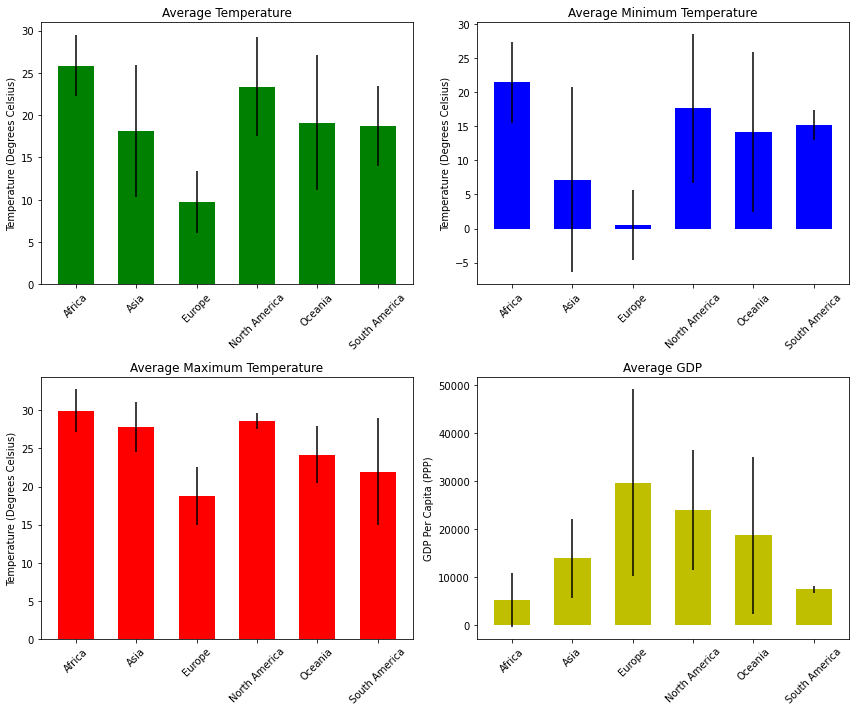

In [158]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

ax[0,0].bar(grouped_continents['Continent'], grouped_continents['Avg All Time']['mean'], width=0.6, color='g', yerr=grouped_continents['Avg All Time']['std'])
ax[0,0].set_xticklabels(grouped_continents['Continent'], rotation=45)
ax[0,0].set_ylabel('Temperature (Degrees Celsius)')
ax[0,0].set_title('Average Temperature')

ax[0,1].bar(grouped_continents['Continent'], grouped_continents['Avg Min Temp']['mean'], width=0.6, color='b', yerr=grouped_continents['Avg Min Temp']['std'])
ax[0,1].set_xticklabels(grouped_continents['Continent'], rotation=45)
ax[0,1].set_ylabel('Temperature (Degrees Celsius)')
ax[0,1].set_title('Average Minimum Temperature')

ax[1,0].bar(grouped_continents['Continent'], grouped_continents['Avg Max Temp']['mean'], width=0.6, color='r', yerr=grouped_continents['Avg Max Temp']['std'])
ax[1,0].set_xticklabels(grouped_continents['Continent'], rotation=45)
ax[1,0].set_ylabel('Temperature (Degrees Celsius)')
ax[1,0].set_title('Average Maximum Temperature')

ax[1,1].bar(grouped_continents['Continent'], grouped_continents['GDP']['mean'], width=0.6, color='y', yerr=grouped_continents['GDP']['std'])
ax[1,1].set_xticklabels(grouped_continents['Continent'], rotation=45)
ax[1,1].set_ylabel('GDP Per Capita (PPP)')
ax[1,1].set_title('Average GDP')

fig.tight_layout()
plt.show()

# Directly Compare GDP with Temperature

Start by findind the correlation coefficients between all variables.

In [159]:
gdp_and_temp.corr()

,Avg All Time,Avg Min Temp,Avg Max Temp,Range,max std,min std,GDP
Avg All Time,1.000000,0.944964,0.827904,-0.678990,-0.734582,-0.674427,-0.573383
Avg Min Temp,0.944964,1.000000,0.602441,-0.880854,-0.775635,-0.765696,-0.499396
Avg Max Temp,0.827904,0.602441,1.000000,-0.152822,-0.435760,-0.341005,-0.516746
Range,-0.678990,-0.880854,-0.152822,1.000000,0.701912,0.745805,0.311852
max std,-0.734582,-0.775635,-0.435760,0.701912,1.000000,0.723325,0.589098
min std,-0.674427,-0.765696,-0.341005,0.745805,0.723325,1.000000,0.440104
GDP,-0.573383,-0.499396,-0.516746,0.311852,0.589098,0.440104,1.000000


The correlation coefficient between GDP and average all time temperature is the strongest. This means they have the closes relationship. 

Plot the temperatures against GDP per capita to visualise the relationships.

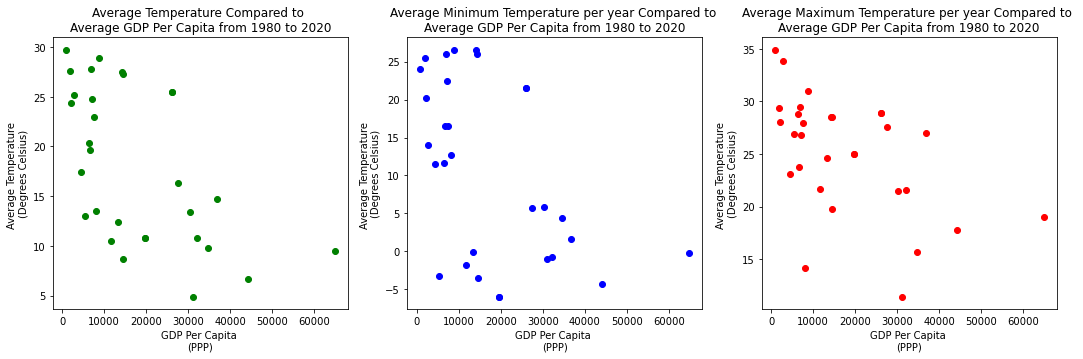

In [160]:
y1 = gdp_and_temp['Avg All Time']
y2 = gdp_and_temp['Avg Min Temp']
y3 = gdp_and_temp['Avg Max Temp']
x = gdp_and_temp['GDP']

figure, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

ax1.scatter(x, y1, color='g')
ax1.set_title('Average Temperature Compared to \nAverage GDP Per Capita from 1980 to 2020')
ax1.set_ylabel('Average Temperature \n(Degrees Celsius)')
ax1.set_xlabel('GDP Per Capita \n(PPP)')

ax2.scatter(x, y2, color='b')
ax2.set_title('Average Minimum Temperature per year Compared to \nAverage GDP Per Capita from 1980 to 2020')
ax2.set_ylabel('Average Temperature \n(Degrees Celsius)')
ax2.set_xlabel('GDP Per Capita \n(PPP)')

ax3.scatter(x, y3, color='r')
ax3.set_title('Average Maximum Temperature per year Compared to \nAverage GDP Per Capita from 1980 to 2020')
ax3.set_ylabel('Average Temperature \n(Degrees Celsius)')
ax3.set_xlabel('GDP Per Capita \n(PPP)')

plt.show()

It is fairly clear from these graphs that the relationship between average temperature and GDP per capita is the strongest. 

Now plot a line of best fit on each graph.

### Shown with Lines of Best Fit

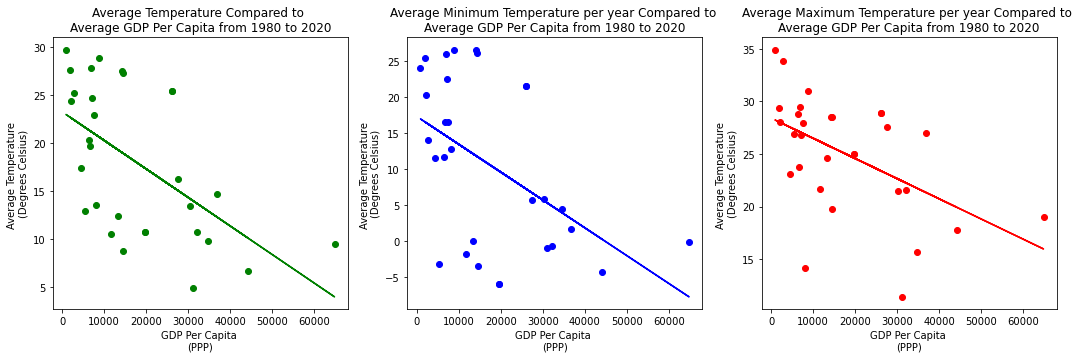

In [161]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

ax1.scatter(x, y1, color='g')
m1, b1 = np.polyfit(x, y1, 1)
ax1.plot(x, m1*x + b1, color='g')
ax1.set_title('Average Temperature Compared to \nAverage GDP Per Capita from 1980 to 2020')
ax1.set_ylabel('Average Temperature \n(Degrees Celsius)')
ax1.set_xlabel('GDP Per Capita \n(PPP)')

ax2.scatter(x, y2, color='b')
m2, b2 = np.polyfit(x, y2, 1)
ax2.plot(x, m2*x + b2, color='b')
ax2.set_title('Average Minimum Temperature per year Compared to \nAverage GDP Per Capita from 1980 to 2020')
ax2.set_ylabel('Average Temperature \n(Degrees Celsius)')
ax2.set_xlabel('GDP Per Capita \n(PPP)')

ax3.scatter(x, y3, color='r')
m3, b3 = np.polyfit(x, y3, 1)
ax3.plot(x, m3*x + b3, color='r')
ax3.set_title('Average Maximum Temperature per year Compared to \nAverage GDP Per Capita from 1980 to 2020')
ax3.set_ylabel('Average Temperature \n(Degrees Celsius)')
ax3.set_xlabel('GDP Per Capita \n(PPP)')

plt.show()

## Logarithmic Line of Best Fit

From plotting the lines of best fit it looks like there is not a linear correlation between the variables, but more of a logarithmic relationship.

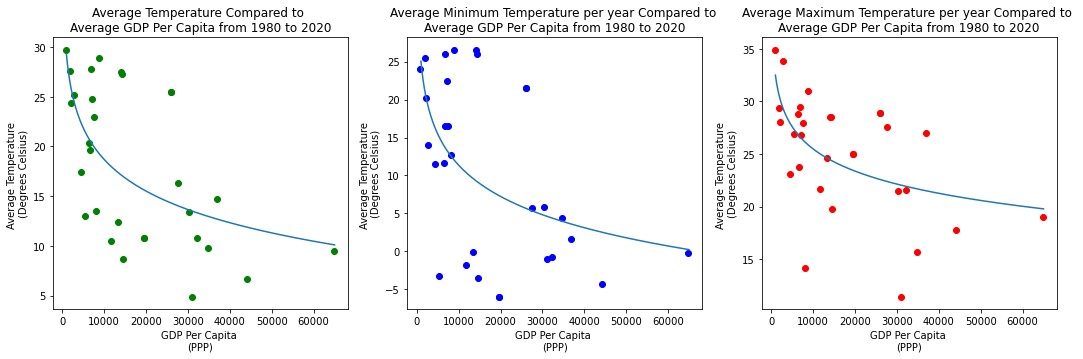

In [162]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
x1 = [i for i in range(1000, 65000)]

ax1.scatter(x, y1, color='g')
m1, c1 = np.polyfit(np.log(x), y1, 1)
y_1 = m1*np.log(x1) + c1
ax1.plot(x1, y_1)
ax1.set_title('Average Temperature Compared to \nAverage GDP Per Capita from 1980 to 2020')
ax1.set_ylabel('Average Temperature \n(Degrees Celsius)')
ax1.set_xlabel('GDP Per Capita \n(PPP)')

x2 = [i for i in range(1000, 65000)]
ax2.scatter(x, y2, color='b')
m2, c2 = np.polyfit(np.log(x), y2, 1)
y_2 = m2*np.log(x2) + c2
ax2.plot(x2, y_2)
ax2.set_title('Average Minimum Temperature per year Compared to \nAverage GDP Per Capita from 1980 to 2020')
ax2.set_ylabel('Average Temperature \n(Degrees Celsius)')
ax2.set_xlabel('GDP Per Capita \n(PPP)')

x3 = [i for i in range(1000, 65000)]
ax3.scatter(x, y3, color='r')
m3, c3 = np.polyfit(np.log(x), y3, 1)
y_3 = m3*np.log(x3) + c3
ax3.plot(x3, y_3)
ax3.set_title('Average Maximum Temperature per year Compared to \nAverage GDP Per Capita from 1980 to 2020')
ax3.set_ylabel('Average Temperature \n(Degrees Celsius)')
ax3.set_xlabel('GDP Per Capita \n(PPP)')

plt.show()

## Create a Model to Predict GDP

Predict GDP from Temperatures.

In [163]:
# Set variables to build the model from
allx = gdp_and_temp[['Avg All Time', 'Avg Min Temp', 'Avg Max Temp']]
y = gdp_and_temp['GDP']

In [164]:
x_train, x_test, y_train, y_test = train_test_split(allx, y, test_size=0.2, random_state=5)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(24, 3)
(6, 3)
(24,)
(6,)


In [165]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [166]:
model.coef_
model.intercept_
equation = 'Equation: y = {:.2f} + {:.2f}*x1 + {:.2f}*x2 + {:.2f}*x3'.format(model.intercept_, model.coef_[0], model.coef_[1], model.coef_[2])

print(equation)

Equation: y = 33890.30 + -9862.13*x1 + 4281.31*x2 + 4574.90*x3


### Test the Model

In [167]:
y_predict = model.predict(x_test)

maerr = mean_absolute_error(y_test, y_predict)
rmse = (np.sqrt(mean_squared_error(y_test, y_predict)))
r2 = r2_score(y_test, y_predict)

print('MAE = ' + str(maerr))
print('RMSE = ' + str(rmse))
print('R2 = ' + str(r2))

MAE = 10220.6825449023
RMSE = 12218.215542423095
R2 = 0.056903186594111754


## GDP and Temperature by Continent

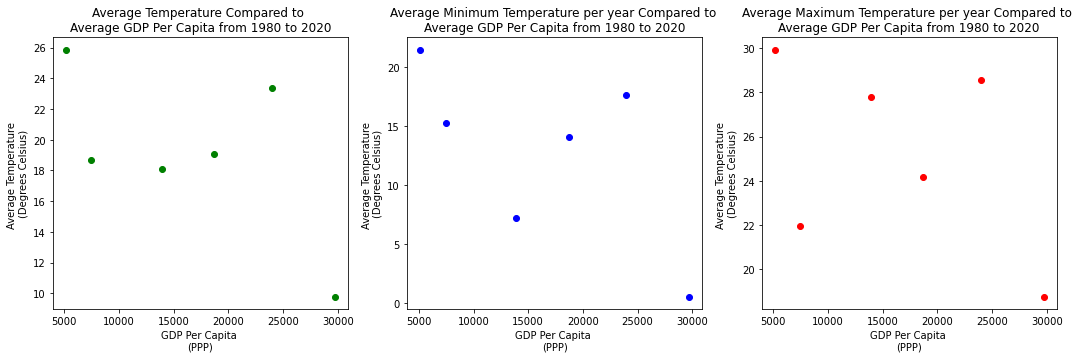

In [168]:
y1 = grouped_continents['Avg All Time']['mean']
y2 = grouped_continents['Avg Min Temp']['mean']
y3 = grouped_continents['Avg Max Temp']['mean']
x = grouped_continents['GDP']['mean']

figure, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

ax1.scatter(x, y1, color='g')
ax1.set_title('Average Temperature Compared to \nAverage GDP Per Capita from 1980 to 2020')
ax1.set_ylabel('Average Temperature \n(Degrees Celsius)')
ax1.set_xlabel('GDP Per Capita \n(PPP)')

ax2.scatter(x, y2, color='b')
ax2.set_title('Average Minimum Temperature per year Compared to \nAverage GDP Per Capita from 1980 to 2020')
ax2.set_ylabel('Average Temperature \n(Degrees Celsius)')
ax2.set_xlabel('GDP Per Capita \n(PPP)')

ax3.scatter(x, y3, color='r')
ax3.set_title('Average Maximum Temperature per year Compared to \nAverage GDP Per Capita from 1980 to 2020')
ax3.set_ylabel('Average Temperature \n(Degrees Celsius)')
ax3.set_xlabel('GDP Per Capita \n(PPP)')

plt.show()

In [169]:
grouped_continents.corr() 

Avg All Time           Avg Min Temp           Avg Max Temp  \
                          mean       std         mean       std         mean   
Avg All Time mean     1.000000  0.070540     0.947694  0.171995     0.881644   
             std      0.070540  1.000000    -0.047619  0.837985     0.234124   
Avg Min Temp mean     0.947694 -0.047619     1.000000 -0.059060     0.685687   
             std      0.171995  0.837985    -0.059060  1.000000     0.493921   
Avg Max Temp mean     0.881644  0.234124     0.685687  0.493921     1.000000   
             std     -0.349257 -0.146675    -0.145456 -0.636864    -0.606859   
GDP          mean    -0.618316  0.065510    -0.633900  0.254728    -0.454458   
             std     -0.534398  0.148571    -0.554045  0.362057    -0.364917   

                                  GDP            
                        std      mean       std  
Avg All Time mean -0.349257 -0.618316 -0.534398  
             std  -0.146675  0.065510  0.148571  
Avg Min Temp mean -0.145456 -0.633900 -0.554045  
             std  -0.636864  0.254728  0.362057  
Avg Max Temp mean -0.606859 -0.454458 -0.364917  
             std   1.000000 -0.404000 -0.460745  
GDP          mean -0.404000  1.000000  0.893156  
             std  -0.460745  0.893156  1.000000

The correlation between GDP and Average Minimum temperature is very strong, at -0.837186. This shows a negative correlation. The correlation between GDP and Avg All time temperature is also strong at -0.773104. 

As the correlation between Average Minimum Temperature and GDP Per Capita is closer to -1 than GDP with Average All Time Temperature, this has the strongest relationship. 

## Calculate Growth Rate of GDP

In [170]:
# Change in GDP per capita from 1980 to 2020
gdp_growth = gdp_df.iloc[-1] / gdp_df.iloc[0]
gdp_growth

Colombia          5.095119
Peru              3.824569
Korea            20.628018
Ireland          13.023210
Paraguay          3.637707
United States     5.047303
Morocco           5.153089
Norway            4.448765
Iceland           5.130726
Tunisia           4.756837
The Bahamas       2.643477
Niger             1.832557
Fiji              4.462383
Turkey            8.659402
Malaysia          8.219731
Senegal           3.276976
Austria           4.939248
Thailand         11.567050
Australia         4.934647
Japan             4.614814
Benin             3.552304
Jamaica           3.432496
Seychelles        5.828449
Luxembourg        7.534747
India            12.236012
Poland            7.082573
China            55.762308
Bulgaria          4.443634
dtype: float64

In [171]:
gdp_and_temp['GDP Growth'] = gdp_growth

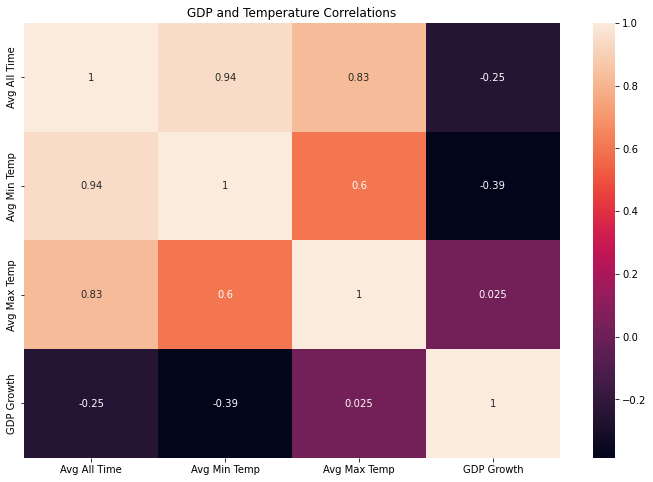

In [172]:
# Assess correlations between Temperature and GDP growth.
fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))
sns.heatmap(gdp_and_temp[['Avg All Time', 'Avg Min Temp', 'Avg Max Temp', 'GDP Growth']].corr(),annot=True, ax=ax1)
ax1.set_title('GDP and Temperature Correlations')
plt.show()

There are no strong correlations between the GDP growth and temperature, so let's plot to see what the data is looking like. 

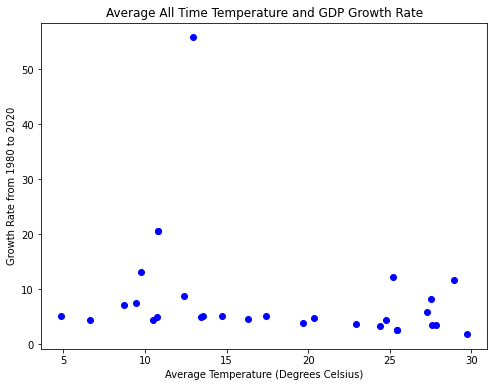

In [173]:
plt.figure(figsize=(8,6))
plt.scatter(gdp_and_temp['Avg All Time'], gdp_and_temp['GDP Growth'], color='b')
plt.title('Average All Time Temperature and GDP Growth Rate')
plt.xlabel('Average Temperature (Degrees Celsius)')
plt.ylabel('Growth Rate from 1980 to 2020')
coef1 = np.corrcoef(gdp_and_temp['Avg All Time'], gdp_and_temp['GDP Growth'])

China is an extreme outlier in this case, however we know the data source is reliable and so this is not an anomoly. Understanding the context and history of China's growth, it is an exception and very few countries have growth this high. Therefore, to assess the relationships between the rest of the data, China will be removed and the graph will be plotted again.

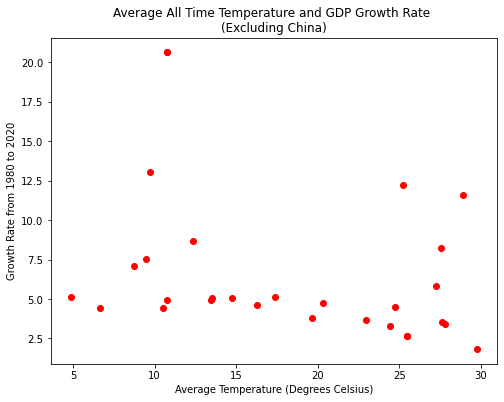

In [174]:
plt.figure(figsize=(8,6))
not_china = gdp_and_temp[gdp_and_temp.index != 'China']
plt.scatter(not_china['Avg All Time'], not_china['GDP Growth'], color='r')
plt.title('Average All Time Temperature and GDP Growth Rate \n(Excluding China)')
plt.xlabel('Average Temperature (Degrees Celsius)')
plt.ylabel('Growth Rate from 1980 to 2020')
coef2 = np.corrcoef(not_china['Avg All Time'], not_china['GDP Growth'])

There is still no clear correlation and so will not be explored further.

# List of Subject Codes and Subject Descriptors

For reference for plotting graphs.

In [175]:
# list unique countries
codes_and_keys

,Subject Descriptor,Units
WEO Subject Code,,
NGDP_R,"Gross domestic product, constant prices",National currency
NGDP_RPCH,"Gross domestic product, constant prices",Percent change
NGDP,"Gross domestic product, current prices",National currency
NGDPD,"Gross domestic product, current prices",U.S. dollars
PPPGDP,"Gross domestic product, current prices",Purchasing power parity; international dollars
NGDP_D,"Gross domestic product, deflator",Index
NGDPRPC,"Gross domestic product per capita, constant pr...",National currency
NGDPRPPPPC,"Gross domestic product per capita, constant pr...",Purchasing power parity; 2017 international do...
NGDPPC,"Gross domestic product per capita, current prices",National currency


# Population vs. Temperature

You can see from these graphs that temperature changes very little over time compared to GDP per capita. With temperature, you're looking at just a degree or even less change over 40 years, whereas with GDP per capita, this can change by a huge amount more. Therefore, from now on the average temperature will be taken from each country and compared with average GDP for that country over time. It will also be compared with the speed of growth from 1980 to the present day.

In [176]:
# A for loop goes through every country and extracts the GDP per Capita and adds it to a new DataFrame
pop_df = pd.DataFrame(columns=filtered_countries)

code = 'LP'

for country in filtered_countries:
    pop = one_ind_one_country(code, country)
    pop_df[country] = pop

In [177]:
pop_df.head()

,Colombia,Peru,Korea,Ireland,Paraguay,United States,Morocco,Norway,Iceland,Tunisia,...,Australia,Japan,Benin,Jamaica,Seychelles,Luxembourg,India,Poland,China,Bulgaria
1980-01-01,27.639,17.333,38.124,3.427,3.151,227.622,19.432,4.092,0.227,6.451,...,14.802,116.769,3.636,2.112,0.063,0.364,698.953,35.567,987.05,8.808
1981-01-01,28.255,17.769,38.723,3.470,3.245,229.916,19.938,4.107,0.229,6.633,...,15.039,117.623,3.763,2.150,0.064,0.365,715.385,35.887,1000.72,8.834
1982-01-01,28.875,18.206,39.326,3.506,3.342,232.128,20.459,4.123,0.232,6.795,...,15.289,118.451,3.878,2.186,0.064,0.366,732.240,36.216,1016.54,8.859
1983-01-01,29.498,18.644,39.910,3.531,3.442,234.247,20.944,4.134,0.236,6.956,...,15.483,119.271,4.004,2.230,0.064,0.366,749.429,36.731,1030.08,8.881
1984-01-01,30.124,19.084,40.406,3.556,3.545,236.307,21.441,4.146,0.238,7.037,...,15.677,120.050,4.130,2.235,0.065,0.366,766.833,37.049,1043.57,8.897


In [178]:
mean_alltime_pop = pop_df.mean(axis=0)
mean_alltime_pop

Colombia           38.733171
Peru               25.613829
Korea              46.196683
Ireland             4.040780
Paraguay            5.243634
United States     280.396512
Morocco            28.140341
Norway              4.598829
Iceland             0.284780
Tunisia             9.437146
The Bahamas         0.300220
Niger              12.622098
Fiji                0.790537
Turkey             64.601341
Malaysia           23.447024
Senegal            10.270390
Austria             8.080561
Thailand           61.336146
Australia          19.660634
Japan             125.015561
Benin               7.214756
Jamaica             2.519341
Seychelles          0.079341
Luxembourg          0.452049
India            1051.047390
Poland             37.920805
China            1239.033659
Bulgaria            8.022439
dtype: float64

In [179]:
gdp_and_temp['Population'] = mean_alltime_pop
gdp_and_temp

,Avg All Time,Avg Min Temp,Avg Max Temp,Range,max std,min std,GDP,Continent,GDP Growth,Population
Australia,13.439024,5.807317,21.529268,15.721951,1.477878,0.748796,30302.500976,Oceania,4.934647,19.660634
Austria,10.763211,-0.775610,21.565854,22.341463,1.424186,1.976586,32179.980244,Europe,4.939248,8.080561
Benin,27.592572,25.463415,29.339024,3.875610,0.440952,0.571732,1910.041024,Africa,3.552304,7.214756
Bulgaria,10.520528,-1.831707,21.682927,23.514634,1.350908,1.681285,11718.085854,Europe,4.443634,8.022439
China,12.970325,-3.192683,26.939024,30.131707,0.975930,1.405950,5339.210341,Asia,55.762308,1239.033659
Colombia,13.537195,12.734146,14.195122,1.460976,0.496463,0.710848,8118.804878,South America,5.095119,38.733171
Fiji,24.750684,22.439024,26.809756,4.370732,0.427086,0.770350,7130.581951,Oceania,4.462383,0.790537
Iceland,4.868293,-0.997561,11.431707,12.429268,1.020892,1.154012,31031.556585,Europe,5.130726,0.284780
India,25.205229,13.960976,33.821951,19.860976,1.075758,0.857577,2697.472878,Asia,12.236012,1051.047390
Ireland,9.744715,4.436585,15.685366,11.248780,0.924002,1.203486,34694.173415,Europe,13.023210,4.040780


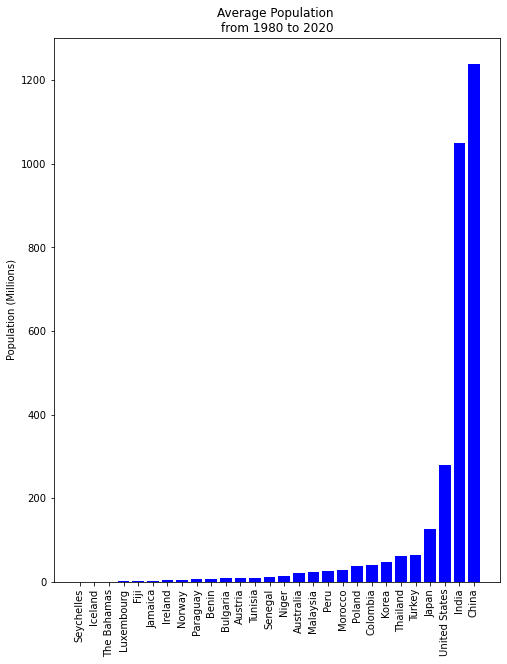

In [180]:
sort_by_pop = gdp_and_temp.sort_values('Population')

plt.figure(figsize=(8, 10))
plt.bar(sort_by_pop.index, sort_by_pop['Population'], color='b')
plt.xticks(rotation=90)
plt.title('Average Population \nfrom 1980 to 2020')
plt.ylabel('Population (Millions)')

plt.show()